In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import logging
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
file_path_for_store_data = './rossmann-store-sales/store.csv'
file_path_for_test_data = './rossmann-store-sales/test.csv'
file_path_for_train_data = './rossmann-store-sales/train.csv'

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Data cleaning and preprocessing for store data

In [4]:
Data_for_store = pd.read_csv(file_path_for_store_data)

In [5]:
Data_for_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [6]:
Data_for_store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [7]:
Data_for_store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [8]:
Data_for_store[['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
                'Promo2SinceWeek', 'Promo2SinceYear']] = \
Data_for_store[['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear',
                'Promo2SinceWeek', 'Promo2SinceYear']].fillna(0)

In [9]:
Data_for_store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                544
dtype: int64

In [10]:
# Replace NaN with 'No Promotion'
Data_for_store['PromoInterval'] = Data_for_store['PromoInterval'].fillna('No Promotion')

In [11]:
Data_for_store.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [12]:
Data_for_store.describe()

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1115.000000                1115.000000   
mean    558.00000          5390.358744                   4.930942   
std     322.01708          7657.973705                   4.284924   
min       1.00000             0.000000                   0.000000   
25%     279.50000           710.000000                   0.000000   
50%     558.00000          2320.000000                   4.000000   
75%     836.50000          6875.000000                   9.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count               1115.000000  1115.000000      1115.000000      1115.000000  
mean                1370.939013     0.512108        12.083408      1030.239462  
std                  935.467654     0.500078        15.542241      1006.038782  
min                    0.000000     0.000000         0.000000         0.000000  
25%                    0.000000     0.000000         0.000000         0.000000  
50%                 2006.000000     1.000000         1.000000      2009.000000  
75%                 2011.000000     1.000000        22.000000      2012.000000  
max                 2015.000000     1.000000        50.000000      2015.000000

In [13]:
Data_for_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [14]:
Data_for_store['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

Assortment - describes an assortment level:

a = basic, b = extra, c = extended

In [15]:
Data_for_store['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [16]:
Data_for_store['PromoInterval'].unique()

array(['No Promotion', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov',
       'Mar,Jun,Sept,Dec'], dtype=object)

In [17]:
# Data_for_store['StoreType']
# # Define mapping for StoreType
# StoreType_mapping = {
#     'a': 0,
#     'b': 1,
#     'c': 2,
#     'd': 3
# }

# # Apply the mapping to convert the column to integers
# Data_for_store['StoreType'] = Data_for_store['StoreType'].map(StoreType_mapping)

In [18]:
# Confirm the conversion
# print(Data_for_store['StoreType'].unique())

In [19]:
# # Define mapping for Assortment
# assortment_mapping = {
#     'a': 0,
#     'b': 1,
#     'c': 2
# }

# # Apply the mapping to convert the column to integers
# Data_for_store['Assortment'] = Data_for_store['Assortment'].map(assortment_mapping)

In [20]:
# Confirm the conversion
# print(Data_for_store['Assortment'].unique())

In [21]:
# # Define mapping for PromoInterval
# promo_mapping = {
#     'No Promotion': 0,
#     'Jan,Apr,Jul,Oct': 1,
#     'Feb,May,Aug,Nov': 2,
#     'Mar,Jun,Sept,Dec': 3
# }

# # Apply the mapping to convert the column to integers
# Data_for_store['PromoInterval'] = Data_for_store['PromoInterval'].map(promo_mapping)

In [22]:
# Confirm the conversion
# Data_for_store['PromoInterval'].unique()

In [23]:
Data_for_store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [24]:
Data_for_store.head(5)

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              0.0              0.0   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              0.0              0.0   
4                    2015.0       0              0.0              0.0   

     PromoInterval  
0     No Promotion  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3     No Promotion  
4     No Promotion

In [25]:
# Select only numerical column
numeric_columns = Data_for_store.select_dtypes(include=['int64','float64']).columns

In [26]:
numeric_columns

Index(['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear'],
      dtype='object')

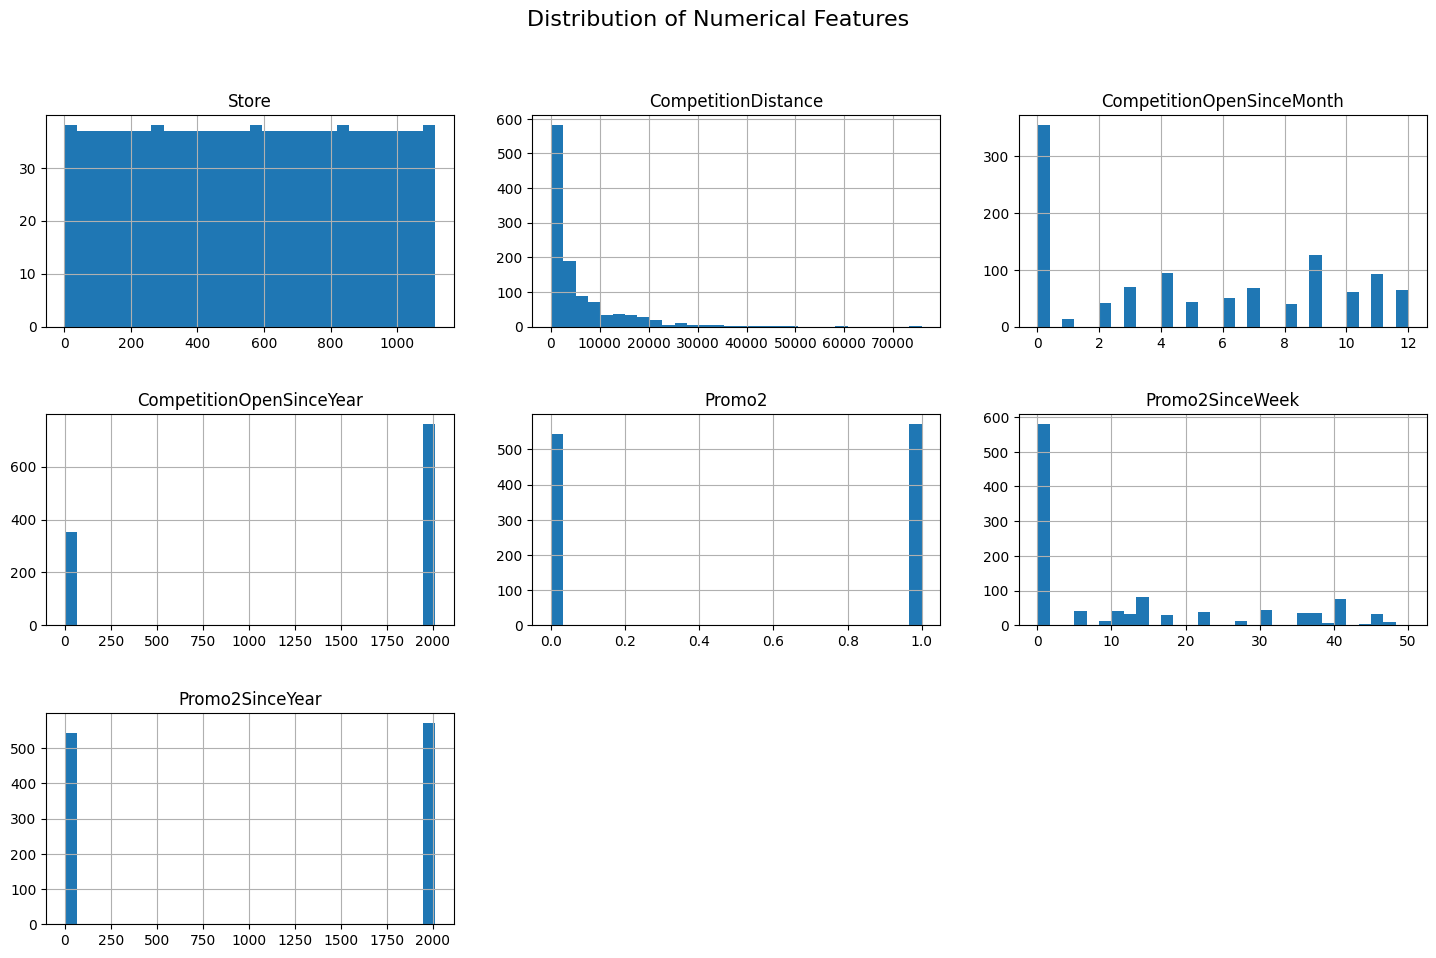

In [27]:
# Plotting histograms for all numerical columns
Data_for_store[numeric_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(pad=3.0)
plt.show()

In [28]:
# Calculating skewness for all numerical columns
skewness = Data_for_store[numeric_columns].skew()
print(skewness)

Store                        0.000000
CompetitionDistance          2.932098
CompetitionOpenSinceMonth    0.187676
CompetitionOpenSinceYear    -0.785114
Promo2                      -0.048510
Promo2SinceWeek              0.950294
Promo2SinceYear             -0.048506
dtype: float64


Skewness Values:

    Between -0.5 and 0.5: Nearly symmetric.
    Between -1 and -0.5 or 0.5 and 1: Moderately skewed.
    Less than -1 or greater than 1: Highly skewed.

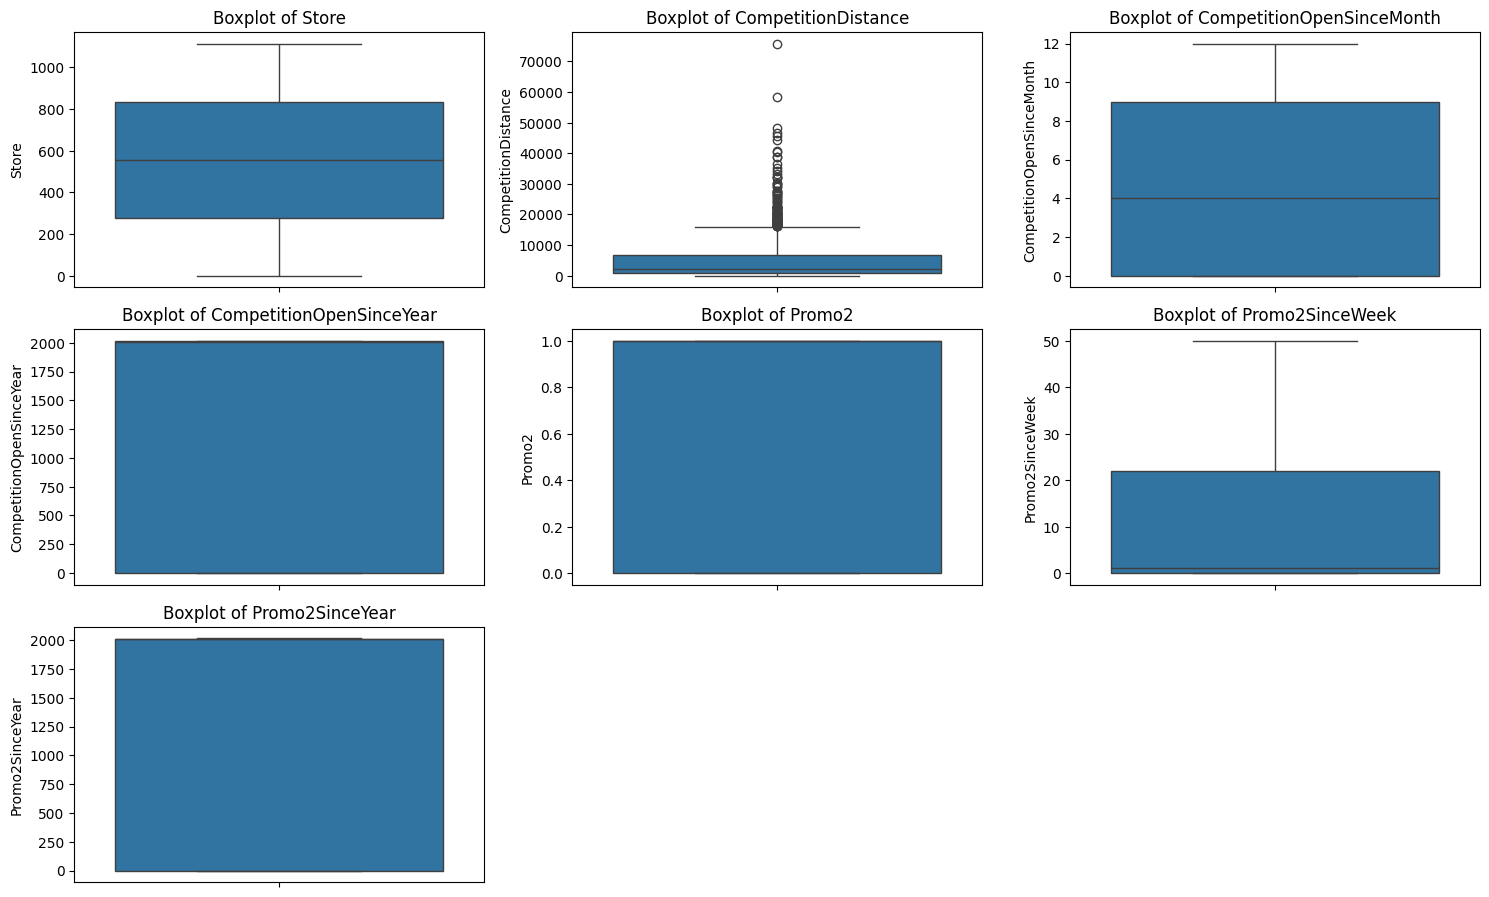

In [29]:
plt.figure(figsize=(15, 12))  # Increase figure size

# Adjust the layout to fit 10 numerical columns in a 4x3 grid
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 3, i)  # Use 4 rows, 3 columns to fit 10 plots
    sns.boxplot(y=Data_for_store[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

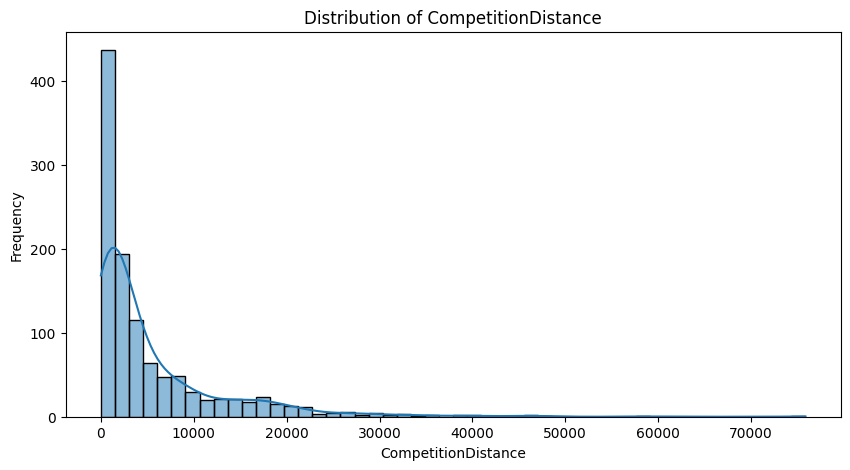

In [30]:
# Inspect the distribution of CompetitionDistance
plt.figure(figsize=(10, 5))
sns.histplot(Data_for_store['CompetitionDistance'], bins=50, kde=True)
plt.title('Distribution of CompetitionDistance')
plt.xlabel('CompetitionDistance')
plt.ylabel('Frequency')
plt.show()

** Observation**
The histogram shows that CompetitionDistance is right-skewed, with most stores having nearby competitors and a few stores having competitors very far away. This validates your idea of using binning to reduce the impact of extreme values.

Apply Binning

Near: Close competition (0 - 1000)

Moderate: Medium distance (1000 - 5000)

Far: Distant competition (5000+)

After binning, we’ll encode these categories into numeric values

In [31]:
# Define bins and labels
bins = [0, 1000, 5000, np.inf]
labels = ['Near', 'Moderate', 'Far']

# Apply binning
Data_for_store['CompetitionDistance_Binned'] = pd.cut(Data_for_store['CompetitionDistance'], bins=bins, labels=labels)

In [32]:
# Display the binned data
Data_for_store[['CompetitionDistance', 'CompetitionDistance_Binned']].head(10)

CompetitionDistance CompetitionDistance_Binned
0               1270.0                   Moderate
1                570.0                       Near
2              14130.0                        Far
3                620.0                       Near
4              29910.0                        Far
5                310.0                       Near
6              24000.0                        Far
7               7520.0                        Far
8               2030.0                   Moderate
9               3160.0                   Moderate

In [33]:
# # Define encoding for the binned categories
# encoding = {'Near': 0, 'Moderate': 1, 'Far': 2}

# # Apply encoding
# Data_for_store['CompetitionDistance_Encoded'] = Data_for_store['CompetitionDistance_Binned'].map(encoding)

In [34]:
# Display the encoded data
# Data_for_store[['CompetitionDistance', 'CompetitionDistance_Binned', 'CompetitionDistance_Encoded']].head(10)

In [35]:
# Drop the unnecessary columns
#Data_for_store.drop(['CompetitionDistance', 'CompetitionDistance_Binned'], axis=1, inplace=True)

In [36]:
# Display the updated DataFrame
# Data_for_store.head()

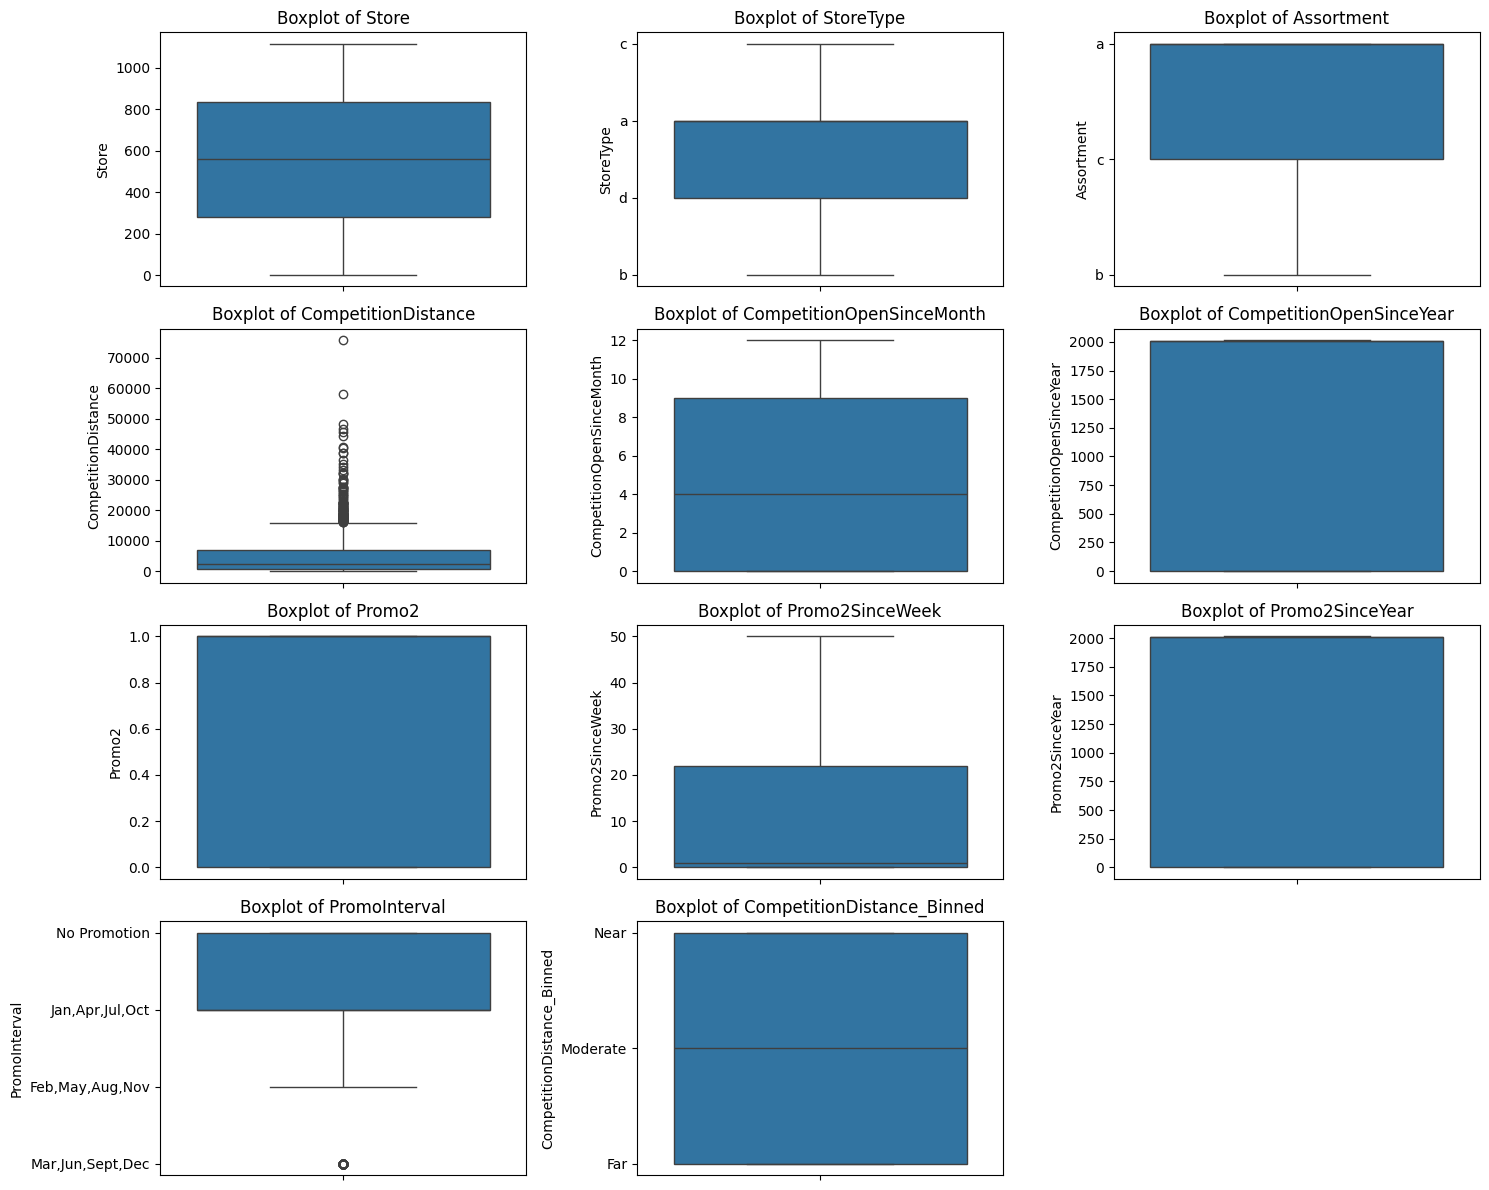

In [37]:
# To check where ant outliers were remaining or not
plt.figure(figsize=(15, 12))  # Increase figure size

# Adjust the layout to fit 10 numerical columns in a 4x3 grid
for i, col in enumerate(Data_for_store, 1):
    plt.subplot(4, 3, i)  # Use 4 rows, 3 columns to fit 10 plots
    sns.boxplot(y=Data_for_store[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [38]:
# Find Correlation among the columns
correlation_matrix_store = Data_for_store[numeric_columns].corr()

In [39]:
correlation_matrix_store

Store  CompetitionDistance  \
Store                      1.000000            -0.027413   
CompetitionDistance       -0.027413             1.000000   
CompetitionOpenSinceMonth -0.030084            -0.030348   
CompetitionOpenSinceYear  -0.005498             0.000608   
Promo2                     0.007486            -0.144740   
Promo2SinceWeek            0.009264            -0.128946   
Promo2SinceYear            0.007521            -0.144806   

                           CompetitionOpenSinceMonth  \
Store                                      -0.030084   
CompetitionDistance                        -0.030348   
CompetitionOpenSinceMonth                   1.000000   
CompetitionOpenSinceYear                    0.785030   
Promo2                                     -0.080671   
Promo2SinceWeek                            -0.106586   
Promo2SinceYear                            -0.080591   

                           CompetitionOpenSinceYear    Promo2  \
Store                                     -0.005498  0.007486   
CompetitionDistance                        0.000608 -0.144740   
CompetitionOpenSinceMonth                  0.785030 -0.080671   
CompetitionOpenSinceYear                   1.000000 -0.095603   
Promo2                                    -0.095603  1.000000   
Promo2SinceWeek                           -0.120918  0.759193   
Promo2SinceYear                           -0.095526  0.999999   

                           Promo2SinceWeek  Promo2SinceYear  
Store                             0.009264         0.007521  
CompetitionDistance              -0.128946        -0.144806  
CompetitionOpenSinceMonth        -0.106586        -0.080591  
CompetitionOpenSinceYear         -0.120918        -0.095526  
Promo2                            0.759193         0.999999  
Promo2SinceWeek                   1.000000         0.759023  
Promo2SinceYear                   0.759023         1.000000

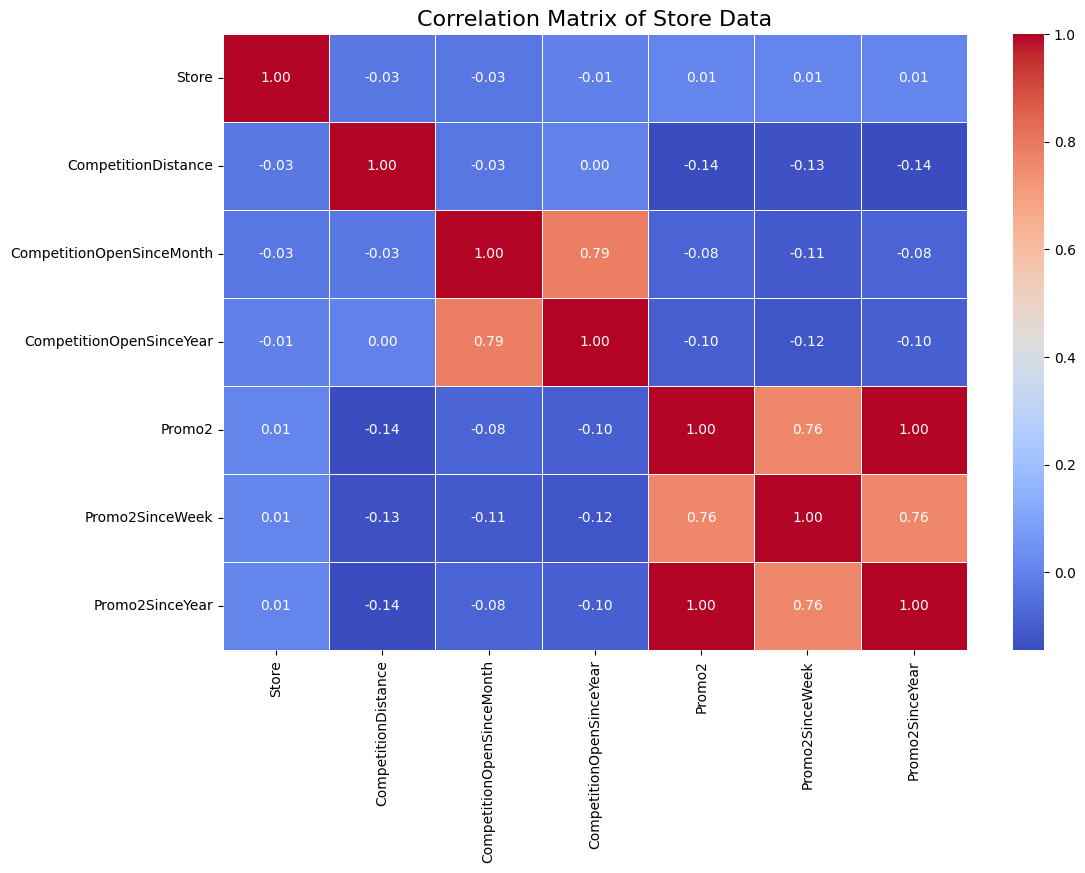

In [40]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
sns.heatmap(correlation_matrix_store, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix of Store Data', fontsize=16)
plt.show()

Perform EDA(Exploratory Data Analysis) for Store Data :

In [41]:
Data_for_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionDistance_Binned'],
      dtype='object')

Univarient Analysis:

In [42]:
Data_for_store['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
          0., 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

What is the Relation between Store Type and Assortment? 

4 different store models: a, b, c, d : 0, 1, 2, 3

Assortment level: a : 0 = basic, b : 1 = extra, c : 2 = extended

In [43]:
store_assortment_count = Data_for_store.groupby(['StoreType', 'Assortment']).size().reset_index(name='StoreCount')

In [44]:
store_assortment_count

StoreType Assortment  StoreCount
0         a          a         381
1         a          c         221
2         b          a           7
3         b          b           9
4         b          c           1
5         c          a          77
6         c          c          71
7         d          a         128
8         d          c         220

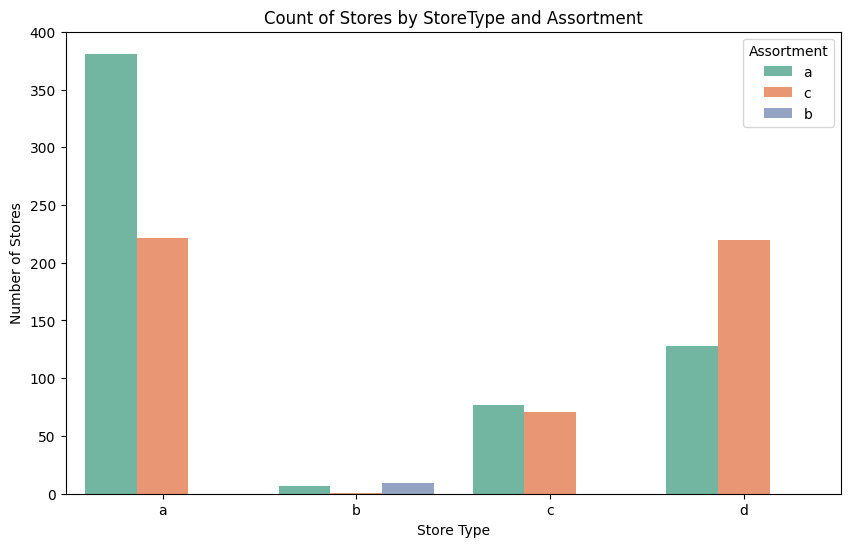

In [45]:
# Creating a bar plot to visualize store count by StoreType and Assortment
plt.figure(figsize=(10, 6))
sns.barplot(data=store_assortment_count, x='StoreType', y='StoreCount', hue='Assortment', palette='Set2')

# Titles and labels
plt.title('Count of Stores by StoreType and Assortment')
plt.xlabel('Store Type')
plt.ylabel('Number of Stores')
plt.legend(title='Assortment')

plt.show()

In [46]:
filtered_data = Data_for_store.groupby('Assortment').agg({'StoreType' : 'count'}).reset_index()

In [47]:
filtered_data

Assortment  StoreType
0          a        593
1          b          9
2          c        513

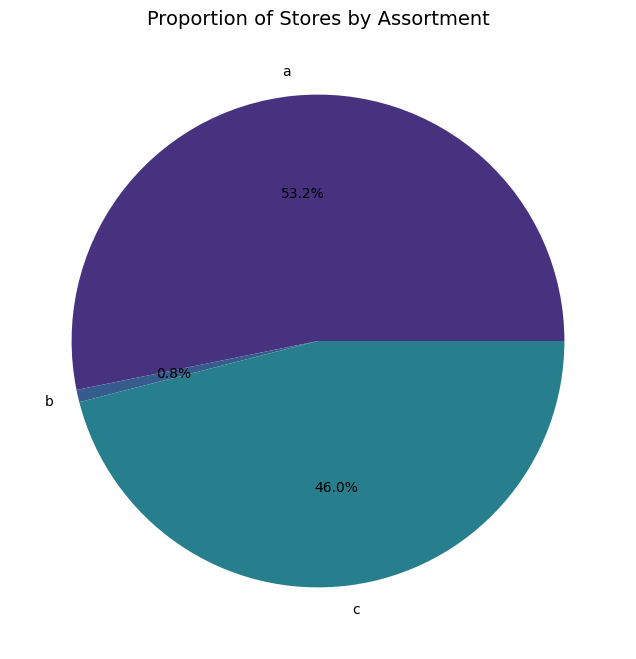

In [48]:
plt.figure(figsize=(8, 8))
plt.pie(filtered_data['StoreType'], labels=filtered_data['Assortment'], autopct='%1.1f%%', colors=sns.color_palette('viridis'))

plt.title('Proportion of Stores by Assortment', fontsize=14)
plt.show()

In [49]:
# store_assortment_competition = Data_for_store.groupby(['StoreType', 'Assortment']).agg({'CompetitionDistance' :'mean',})

In [50]:
# store_assortment_competition

In [51]:
# # Facet grid for visualizing each Assortment separately
# g = sns.FacetGrid(store_assortment_competition, col='Assortment', height=5, aspect=1)
# g.map_dataframe(sns.barplot, x='StoreType', y='CompetitionDistance', palette='muted',legend=False, hue='StoreType')

# g.set_axis_labels('Store Type', 'Average Competition Distance')
# g.fig.suptitle('Average Competition Distance by Store Type for Each Assortment', fontsize=16)
# g.fig.subplots_adjust(top=0.85)
# plt.show()

In [52]:
# Grouping by StoreType and Assortment to analyze Promo2 participation
promo_distribution = Data_for_store.groupby(['StoreType', 'Assortment'])['Promo2'].count().reset_index()

In [53]:
promo_distribution

StoreType Assortment  Promo2
0         a          a     381
1         a          c     221
2         b          a       7
3         b          b       9
4         b          c       1
5         c          a      77
6         c          c      71
7         d          a     128
8         d          c     220

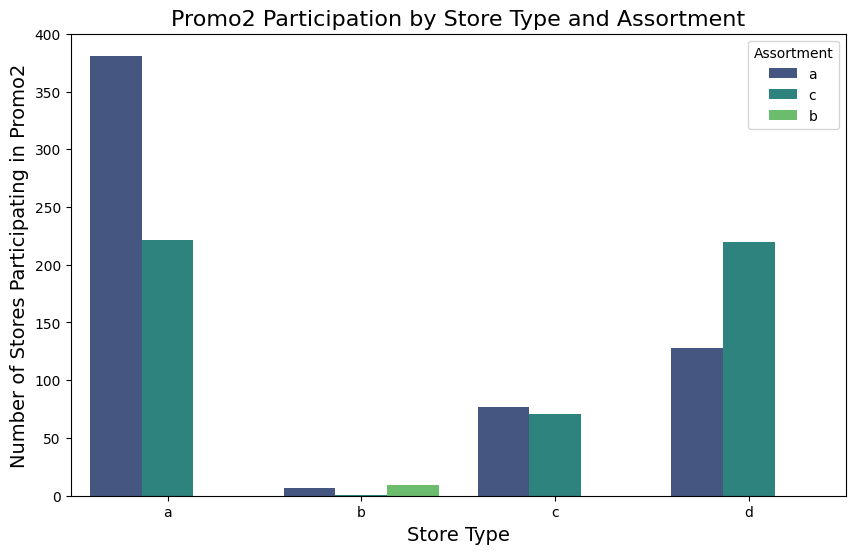

In [54]:
# Grouped Bar Plot for Promo2 Participationerent 
plt.figure(figsize=(10, 6))
sns.barplot(x='StoreType', y='Promo2', hue='Assortment', data=promo_distribution, palette='viridis')

plt.title('Promo2 Participation by Store Type and Assortment', fontsize=16)
plt.xlabel('Store Type', fontsize=14)
plt.ylabel('Number of Stores Participating in Promo2', fontsize=14)
plt.legend(title='Assortment')
plt.show()

In [55]:
Data_for_store.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionDistance_Binned'],
      dtype='object')

Latest Competition open for store.

In [56]:
store_CompDist_CompOpenMonth = Data_for_store.groupby(['Store','CompetitionDistance'],observed=False).agg({'CompetitionOpenSinceMonth' : 'max',
                                                                                                        'CompetitionOpenSinceYear': 'max'}).reset_index()

In [57]:
store_CompDist_CompOpenMonth

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
0         1               1270.0                        9.0   
1         2                570.0                       11.0   
2         3              14130.0                       12.0   
3         4                620.0                        9.0   
4         5              29910.0                        4.0   
...     ...                  ...                        ...   
1110   1111               1900.0                        6.0   
1111   1112               1880.0                        4.0   
1112   1113               9260.0                        0.0   
1113   1114                870.0                        0.0   
1114   1115               5350.0                        0.0   

      CompetitionOpenSinceYear  
0                       2008.0  
1                       2007.0  
2                       2006.0  
3                       2009.0  
4                       2015.0  
...                        ...  
1110                    2014.0  
1111                    2006.0  
1112                       0.0  
1113                       0.0  
1114                       0.0  

[1115 rows x 4 columns]

In [58]:
store_CompDist_CompOpenMonth.to_clipboard()

In [59]:
store_2_data = store_CompDist_CompOpenMonth[store_CompDist_CompOpenMonth['Store'] == 2]

In [60]:
store_2_data

Store  CompetitionDistance  CompetitionOpenSinceMonth  \
1      2                570.0                       11.0   

   CompetitionOpenSinceYear  
1                    2007.0

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [61]:
import os

# Check if the file exists
if os.path.exists(file_path_for_train_data):
    print("File exists:", file_path_for_train_data)
else:
    print("File not found! Please check the file path.")

File exists: ./rossmann-store-sales/train.csv


Load the train data and pre process it.

In [62]:
# Define the numeric mapping for holidays
# numeric_mapping = {
#     'a': 1,  # Public Holiday
#     'b': 2,  # Easter Holiday
#     'c': 3,  # Christmas
#     '0': 0   # None
# }

# Load and apply the numeric mapping
Data_for_train = pd.read_csv(
    file_path_for_train_data,
    # converters={'StateHoliday': lambda x: numeric_mapping.get(str(x), 0)},
    low_memory=False
)

In [63]:
Data_for_train.shape

(1017209, 9)

In [64]:
Data_for_train.head()

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  7/31/2015   5263        555     1      1            0   
1      2          5  7/31/2015   6064        625     1      1            0   
2      3          5  7/31/2015   8314        821     1      1            0   
3      4          5  7/31/2015  13995       1498     1      1            0   
4      5          5  7/31/2015   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [65]:
Data_for_train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [66]:
Data_for_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [67]:
Data_for_train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [68]:
Data_for_train['StateHoliday'].value_counts().unique

<bound method Series.unique of StateHoliday
0    986159
a     20260
b      6690
c      4100
Name: count, dtype: int64>

In [69]:
Data_for_train['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [70]:
# Convert 'Date' to datetime format
Data_for_train['Date'] = pd.to_datetime(Data_for_train['Date'])

In [71]:
Data_for_train['Date'].dtypes

dtype('<M8[ns]')

In [72]:
Data_for_train['Year'] = Data_for_train['Date'].dt.year
Data_for_train['Month'] = Data_for_train['Date'].dt.month
Data_for_train['Day'] = Data_for_train['Date'].dt.day
Data_for_train['WeekOfYear'] = Data_for_train['Date'].dt.isocalendar().week
Data_for_train['IsHoliday'] = Data_for_train['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [73]:
Data_for_train.to_csv("./rossmann-store-sales/train_data.csv", index=False)

In [74]:
Data_for_train.head(5)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  Year  Month  Day  WeekOfYear  IsHoliday  
0              1  2015      7   31          31          1  
1              1  2015      7   31          31          1  
2              1  2015      7   31          31          1  
3              1  2015      7   31          31          1  
4              1  2015      7   31          31          1

In [75]:
Data_for_train.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
Year                      int32
Month                     int32
Day                       int32
WeekOfYear               UInt32
IsHoliday                 int64
dtype: object

In [76]:
numeric_columns_for_train_data = Data_for_train.select_dtypes(include=['int64','float64','int32','UInt32']).columns

In [77]:
numeric_columns_for_train_data

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 'IsHoliday'],
      dtype='object')

In [78]:
# Calculating skewness for all numerical columns
skewness_train = Data_for_train[numeric_columns_for_train_data].skew()
print(skewness_train)

Store           -0.000955
DayOfWeek        0.001593
Sales             0.64146
Customers         1.59865
Open            -1.758045
Promo            0.487838
SchoolHoliday    1.677842
Year             0.300265
Month            0.274202
Day              0.008454
WeekOfYear       0.278479
IsHoliday        0.291279
dtype: Float64


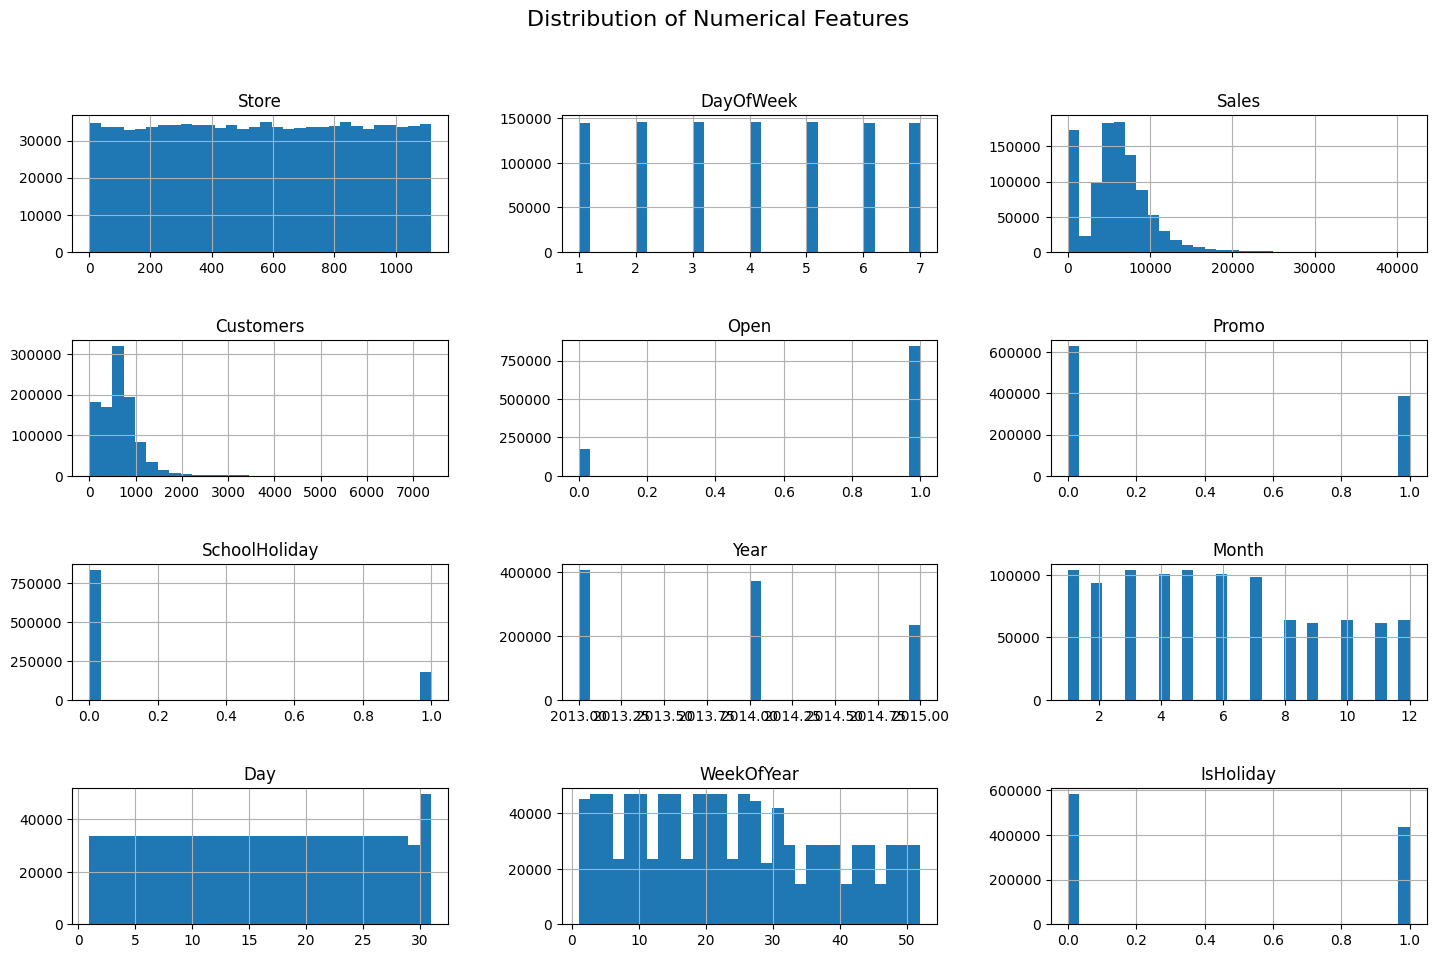

In [79]:
# Plotting histograms for all numerical columns
Data_for_train[numeric_columns_for_train_data].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(pad=3.0)
plt.show()

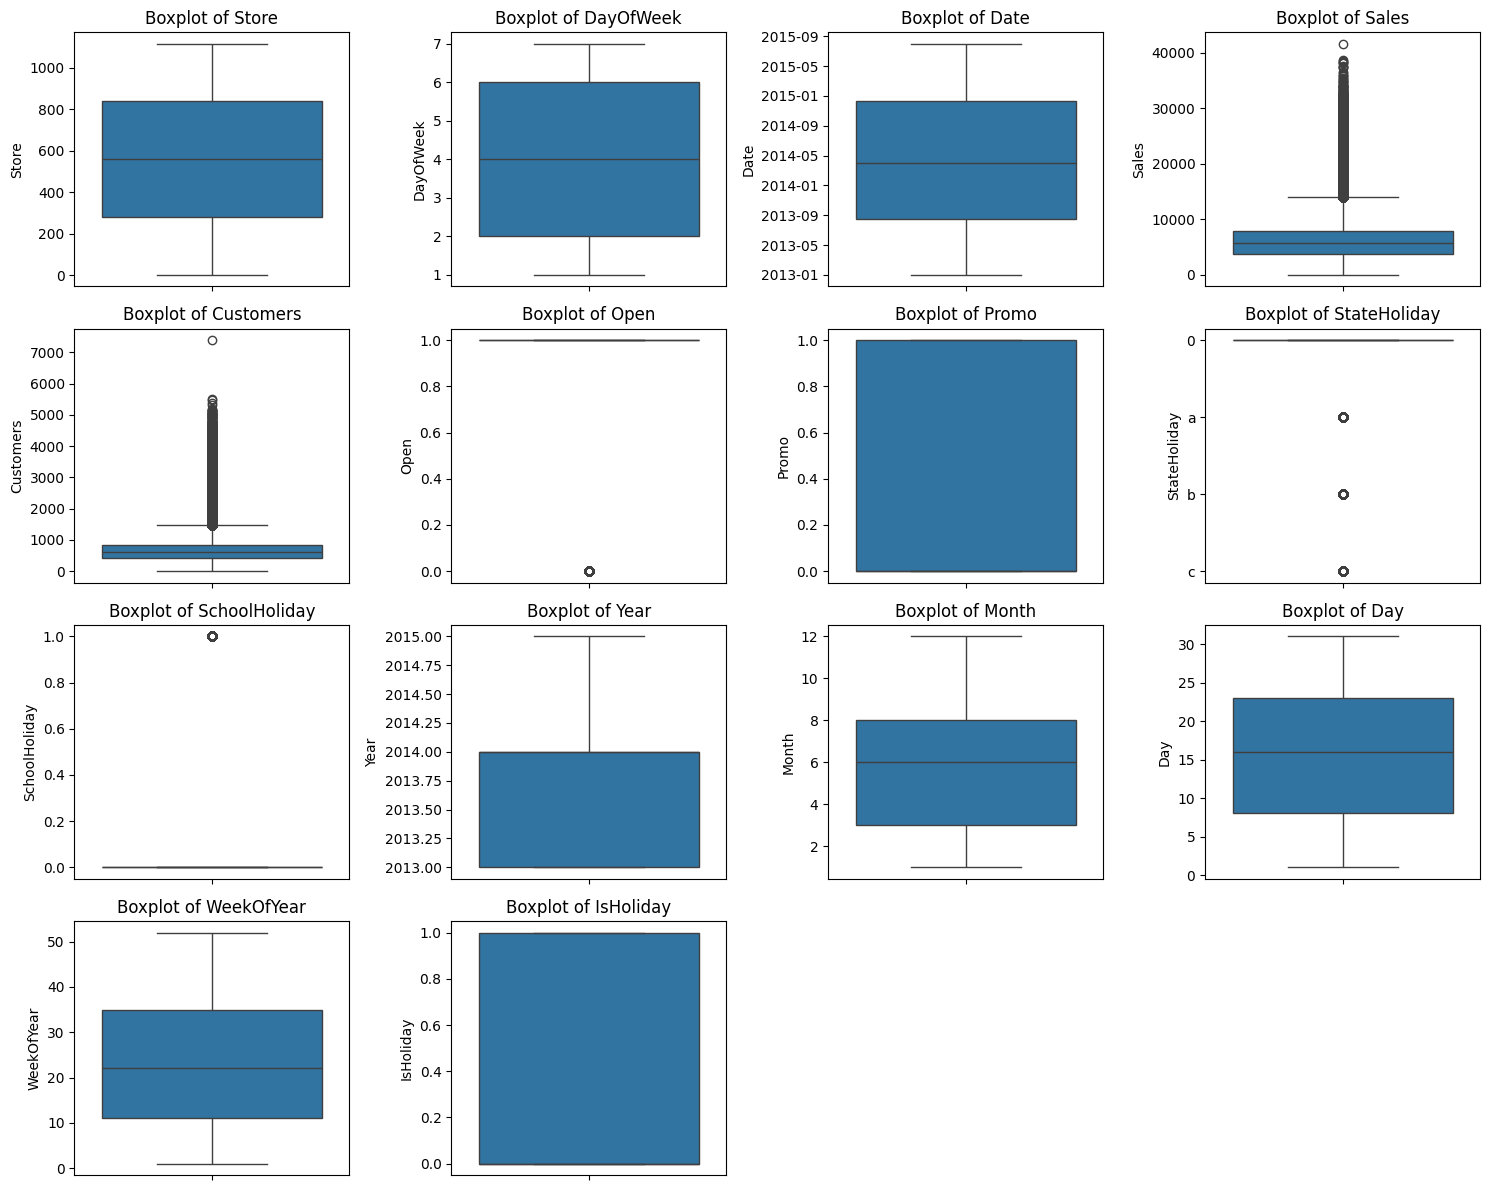

In [80]:
# To check where ant outliers were remaining or not
plt.figure(figsize=(15, 12))  # Increase figure size

# Adjust the layout to fit 10 numerical columns in a 4x3 grid
for i, col in enumerate(Data_for_train, 1):
    plt.subplot(4, 4, i)  # Use 4 rows, 3 columns to fit 10 plots
    sns.boxplot(y=Data_for_train[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

In [81]:
correlation_matrix_for_train = Data_for_train[numeric_columns_for_train_data].corr()

In [82]:
correlation_matrix_for_train

Store  DayOfWeek     Sales  Customers      Open     Promo  \
Store          1.000000  -0.000008  0.005126   0.024325 -0.000047  0.000058   
DayOfWeek     -0.000008   1.000000 -0.462125  -0.386445 -0.528963 -0.392925   
Sales          0.005126  -0.462125  1.000000   0.894711  0.678472  0.452345   
Customers      0.024325  -0.386445  0.894711   1.000000  0.616768  0.316169   
Open          -0.000047  -0.528963  0.678472   0.616768  1.000000  0.295042   
Promo          0.000058  -0.392925  0.452345   0.316169  0.295042  1.000000   
SchoolHoliday  0.000641  -0.205388  0.085124   0.071568  0.086171  0.067483   
Year           0.000290   0.001937  0.023519  -0.001212 -0.001009  0.024300   
Month          0.001467  -0.005362  0.048768   0.038179 -0.000681 -0.011747   
Day            0.000023   0.005136 -0.011612  -0.004473  0.033428 -0.108325   
WeekOfYear     0.001421  -0.004880  0.052946   0.041404  0.004792  0.000572   
IsHoliday     -0.000010   0.865650 -0.339044  -0.286407 -0.397121 -0.361974   

               SchoolHoliday      Year     Month       Day  WeekOfYear  \
Store               0.000641  0.000290  0.001467  0.000023    0.001421   
DayOfWeek          -0.205388  0.001937 -0.005362  0.005136   -0.004880   
Sales               0.085124  0.023519  0.048768 -0.011612    0.052946   
Customers           0.071568 -0.001212  0.038179 -0.004473    0.041404   
Open                0.086171 -0.001009 -0.000681  0.033428    0.004792   
Promo               0.067483  0.024300 -0.011747 -0.108325    0.000572   
SchoolHoliday       1.000000 -0.036535  0.103282  0.030538    0.071052   
Year               -0.036535  1.000000 -0.269382 -0.002485   -0.256619   
Month               0.103282 -0.269382  1.000000  0.012442    0.967034   
Day                 0.030538 -0.002485  0.012442  1.000000    0.069624   
WeekOfYear          0.071052 -0.256619  0.967034  0.069624    1.000000   
IsHoliday          -0.187161  0.001352 -0.002055  0.002619   -0.003541   

               IsHoliday  
Store          -0.000010  
DayOfWeek       0.865650  
Sales          -0.339044  
Customers      -0.286407  
Open           -0.397121  
Promo          -0.361974  
SchoolHoliday  -0.187161  
Year            0.001352  
Month          -0.002055  
Day             0.002619  
WeekOfYear     -0.003541  
IsHoliday       1.000000

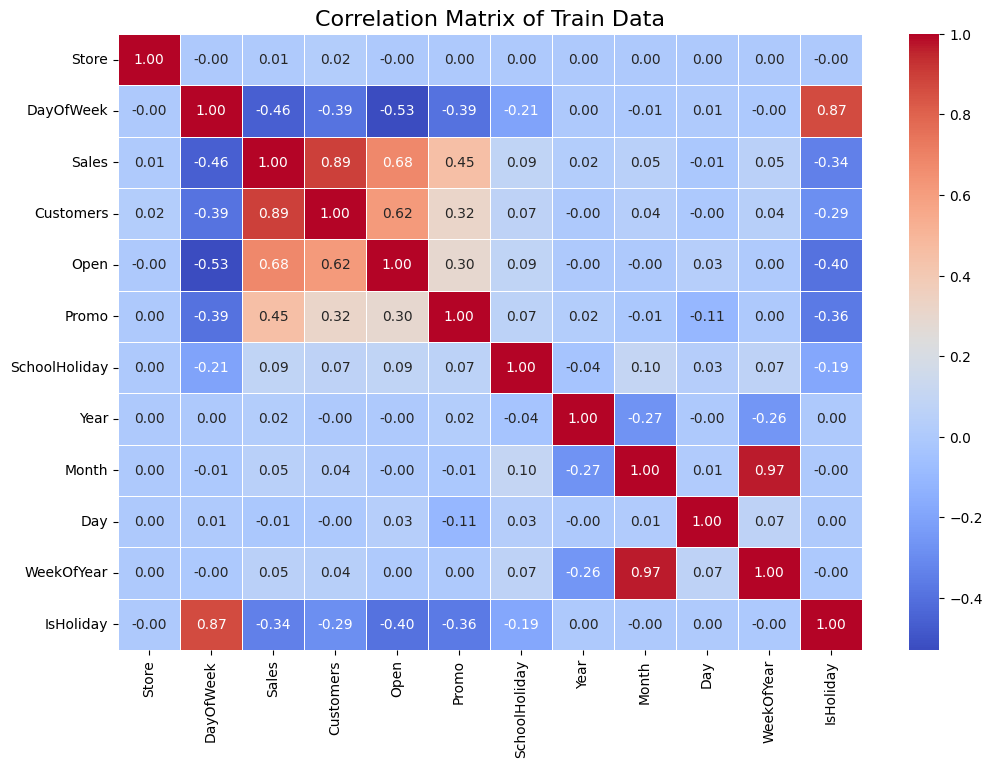

In [83]:
# Plotting the heatmap
plt.figure(figsize=(12, 8))  # Set the figure size for better readability
sns.heatmap(correlation_matrix_for_train, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix of Train Data', fontsize=16)
plt.show()

In [84]:
Data_for_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'IsHoliday'],
      dtype='object')

How to calculate sales per Date of the store and how many customers are there on that particular day?

In [85]:
# Grouping by Store and Date to calculate total Sales and Customers per day
sales_customers_per_date = Data_for_train.groupby(['Store', 'Date'])[['Sales', 'Customers']].sum().reset_index()

In [86]:
sales_customers_per_date

Store       Date  Sales  Customers
0            1 2013-01-01      0          0
1            1 2013-01-02   5530        668
2            1 2013-01-03   4327        578
3            1 2013-01-04   4486        619
4            1 2013-01-05   4997        635
...        ...        ...    ...        ...
1017204   1115 2015-07-27  10712        608
1017205   1115 2015-07-28   8093        500
1017206   1115 2015-07-29   7661        473
1017207   1115 2015-07-30   8405        502
1017208   1115 2015-07-31   8680        538

[1017209 rows x 4 columns]

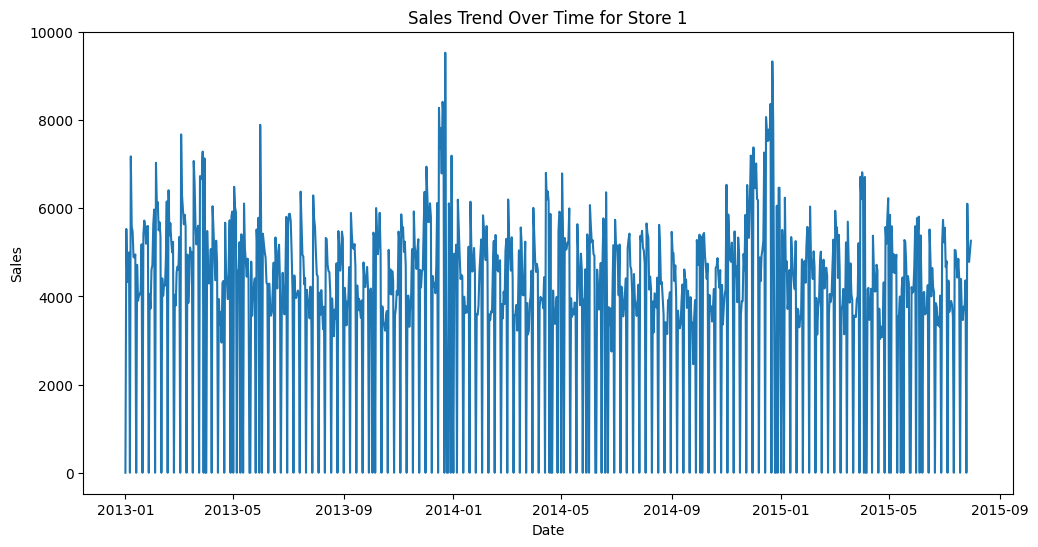

In [87]:
#To visualize how sales change over time for a particular store:
store_1_data = sales_customers_per_date[sales_customers_per_date['Store'] == 1]

# Plot Sales over time for Store 1
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', data=store_1_data)
plt.title('Sales Trend Over Time for Store 1')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [88]:
average_sales_customers_per_date = Data_for_train.groupby(['Store', 'Date'])[['Sales', 'Customers']].mean().reset_index()

In [89]:
average_sales_customers_per_date

Store       Date    Sales  Customers
0            1 2013-01-01      0.0        0.0
1            1 2013-01-02   5530.0      668.0
2            1 2013-01-03   4327.0      578.0
3            1 2013-01-04   4486.0      619.0
4            1 2013-01-05   4997.0      635.0
...        ...        ...      ...        ...
1017204   1115 2015-07-27  10712.0      608.0
1017205   1115 2015-07-28   8093.0      500.0
1017206   1115 2015-07-29   7661.0      473.0
1017207   1115 2015-07-30   8405.0      502.0
1017208   1115 2015-07-31   8680.0      538.0

[1017209 rows x 4 columns]

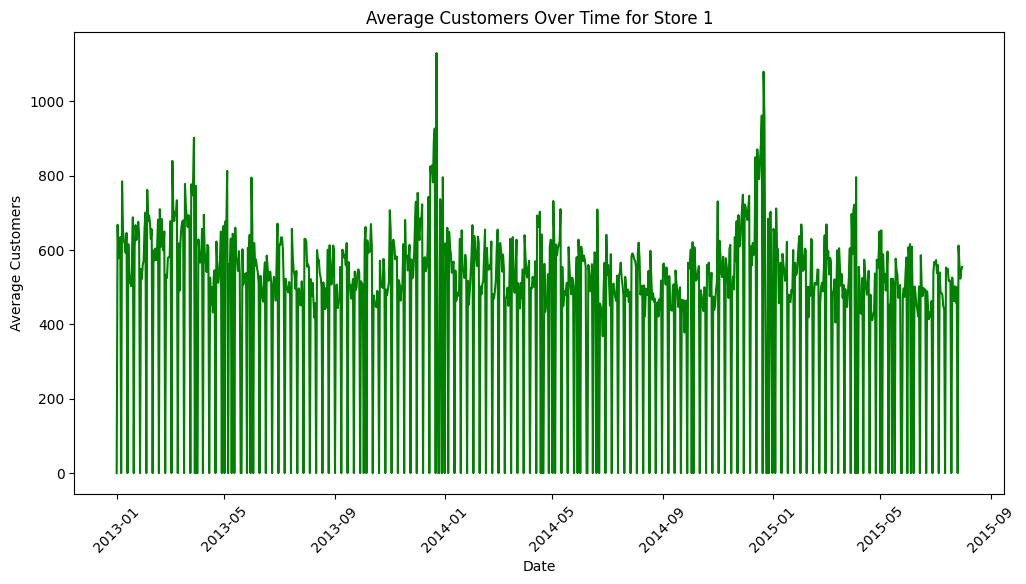

In [90]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Customers', data=store_1_data, color='green')
plt.title('Average Customers Over Time for Store 1')
plt.xlabel('Date')
plt.ylabel('Average Customers')
plt.xticks(rotation=45)
plt.show()

Total and maximum sales per store till the day (not just per date):

In [91]:
# Group by 'Store' and calculate both sum and max of Sales with custom column names
total_max_sales_per_store = Data_for_train.groupby('Store').agg(
    Total_Sales=('Sales', 'sum'),
    Max_Sales=('Sales', 'max')
).reset_index()

In [92]:
total_max_sales_per_store

Store  Total_Sales  Max_Sales
0         1      3716854       9528
1         2      3883858      10682
2         3      5408261      15689
3         4      7556507      17412
4         5      3642818      11692
...     ...          ...        ...
1110   1111      4091076      12492
1111   1112      7974294      25165
1112   1113      5196242      16115
1113   1114     16202585      35697
1114   1115      4922229      12491

[1115 rows x 3 columns]

In [93]:
Data_for_train.head(5)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  Year  Month  Day  WeekOfYear  IsHoliday  
0              1  2015      7   31          31          1  
1              1  2015      7   31          31          1  
2              1  2015      7   31          31          1  
3              1  2015      7   31          31          1  
4              1  2015      7   31          31          1

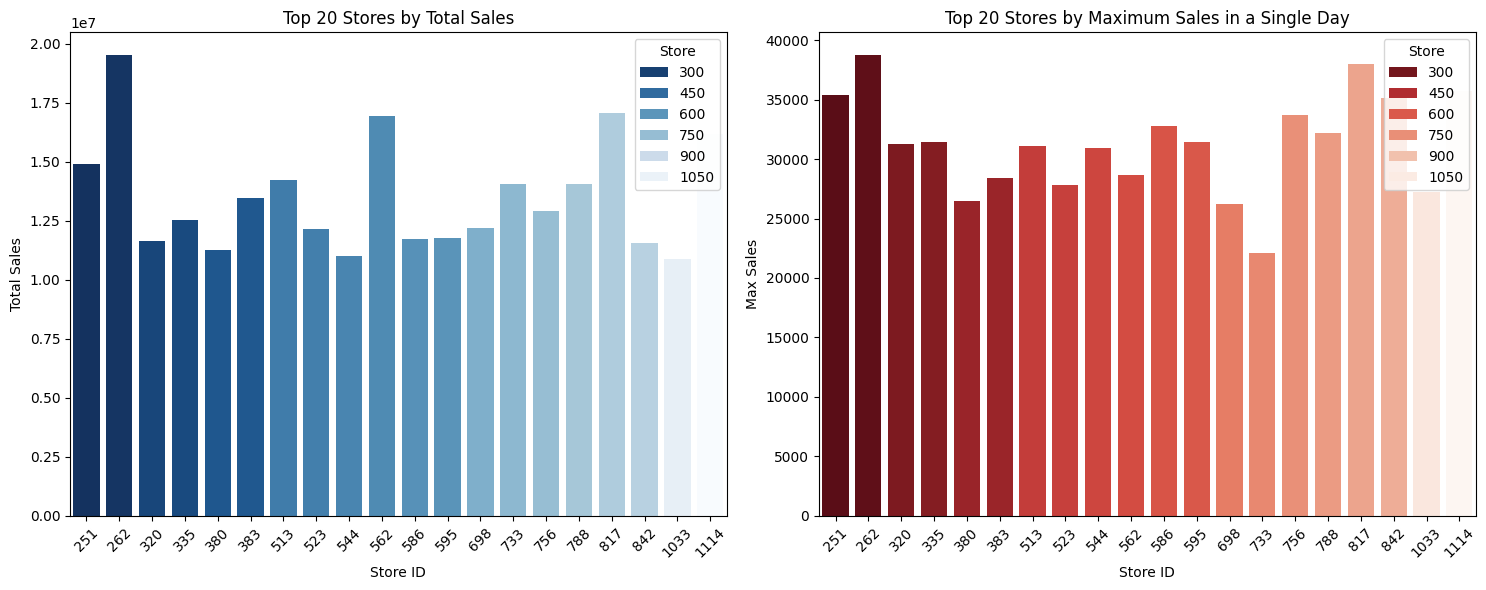

In [94]:
# Select top 20 stores by Total Sales
top_stores = total_max_sales_per_store.sort_values(by="Total_Sales", ascending=False).head(20)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot Total Sales in the first subplot
sns.barplot(data=top_stores, x="Store", y="Total_Sales", palette="Blues_r", ax=axes[0], hue ='Store')
axes[0].set_title("Top 20 Stores by Total Sales")
axes[0].set_xlabel("Store ID")
axes[0].set_ylabel("Total Sales")
axes[0].tick_params(axis='x', rotation=45)

# Plot Max Sales in the second subplot
sns.barplot(data=top_stores, x="Store", y="Max_Sales", palette="Reds_r", ax=axes[1], hue ='Store')
axes[1].set_title("Top 20 Stores by Maximum Sales in a Single Day")
axes[1].set_xlabel("Store ID")
axes[1].set_ylabel("Max Sales")
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

On Perticular Day of the week what is the average sale of all stores. 

In [95]:
# Average Sales by Day of the week
avg_sale_by_day_of_week = Data_for_train.groupby('DayOfWeek')['Sales'].mean().reset_index()

In [96]:
avg_sale_by_day_of_week

DayOfWeek        Sales
0          1  7809.044510
1          2  7005.244467
2          3  6555.884138
3          4  6247.575913
4          5  6723.274305
5          6  5847.562599
6          7   204.183189

** Observation **

Maximum sale is on first day of the week when store is open after holidays,
and least sale is on Sunday, because of holiday.

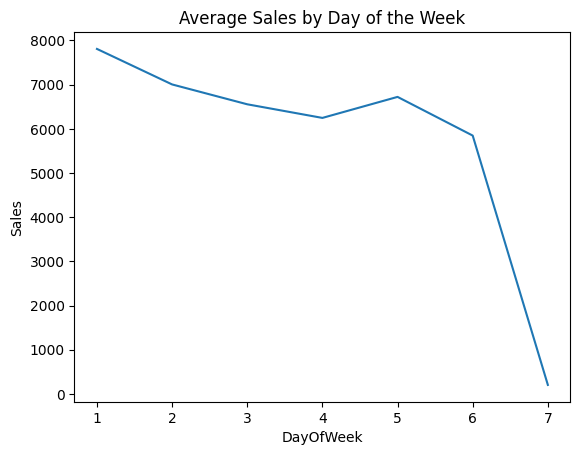

In [97]:
sns.lineplot(x='DayOfWeek', y='Sales', data= avg_sale_by_day_of_week)
plt.title('Average Sales by Day of the Week')
plt.show()

On Perticular Day of the week what is the average sale of all stores according to store.

In [98]:
avg_sale_by_day_of_week_store= Data_for_train.groupby(['Store','DayOfWeek'])['Sales'].mean().reset_index()

In [99]:
avg_sale_by_day_of_week_store

Store  DayOfWeek        Sales
0         1          1  4946.119403
1         1          2  4650.918519
2         1          3  4454.474074
3         1          4  4094.607407
4         1          5  4516.414815
...     ...        ...          ...
7800   1115          3  5666.155556
7801   1115          4  5396.607407
7802   1115          5  6208.881481
7803   1115          6  6773.388060
7804   1115          7     0.000000

[7805 rows x 3 columns]

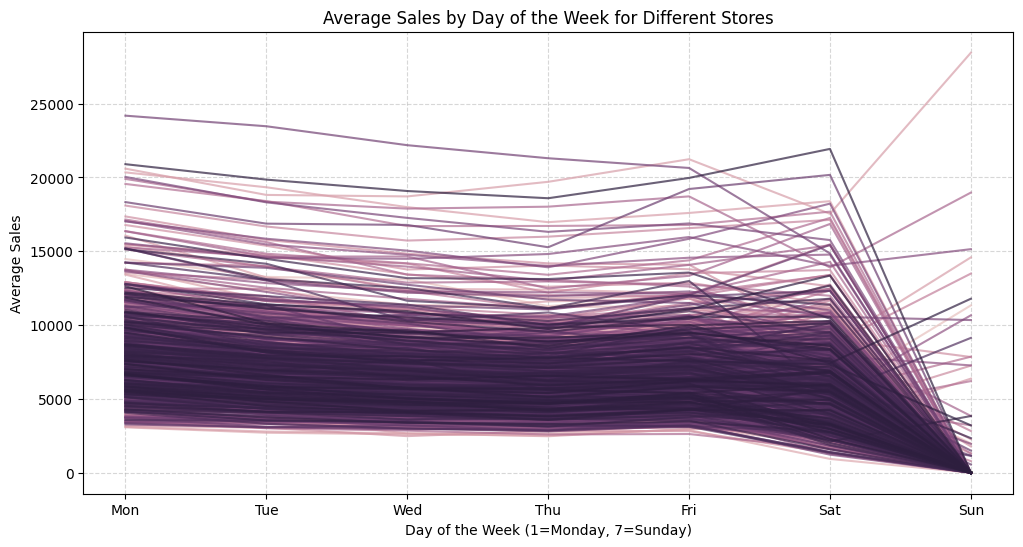

In [100]:
# Set figure size
plt.figure(figsize=(12, 6))

# Plot sales trend across days of the week for different stores
sns.lineplot(data=avg_sale_by_day_of_week_store, x="DayOfWeek", y="Sales", hue="Store", alpha=0.7, linewidth=1.5, legend=False)

# Titles and labels
plt.title("Average Sales by Day of the Week for Different Stores")
plt.xlabel("Day of the Week (1=Monday, 7=Sunday)")
plt.ylabel("Average Sales")
plt.xticks(ticks=range(1, 8), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [101]:
monthly_sales_state_holiday = Data_for_train.groupby(['Month','StateHoliday']).agg({'Sales' : 'mean'}).reset_index()

In [102]:
monthly_sales_state_holiday

Month StateHoliday        Sales
0       1            0  5694.046602
1       1            a    95.523731
2       2            0  5645.253150
3       3            0  5845.369322
4       3            b   191.857399
5       4            0  6063.576597
6       4            b   218.802332
7       5            0  6025.929762
8       5            a   284.594879
9       6            0  5899.275887
10      6            a   655.769928
11      7            0  6064.915711
12      8            0  5706.124949
13      8            a  1078.133333
14      9            0  5570.246033
15     10            0  5742.630644
16     10            a   262.156879
17     11            0  6117.481117
18     11            a   154.527482
19     12            0  7285.775391
20     12            c   168.733171

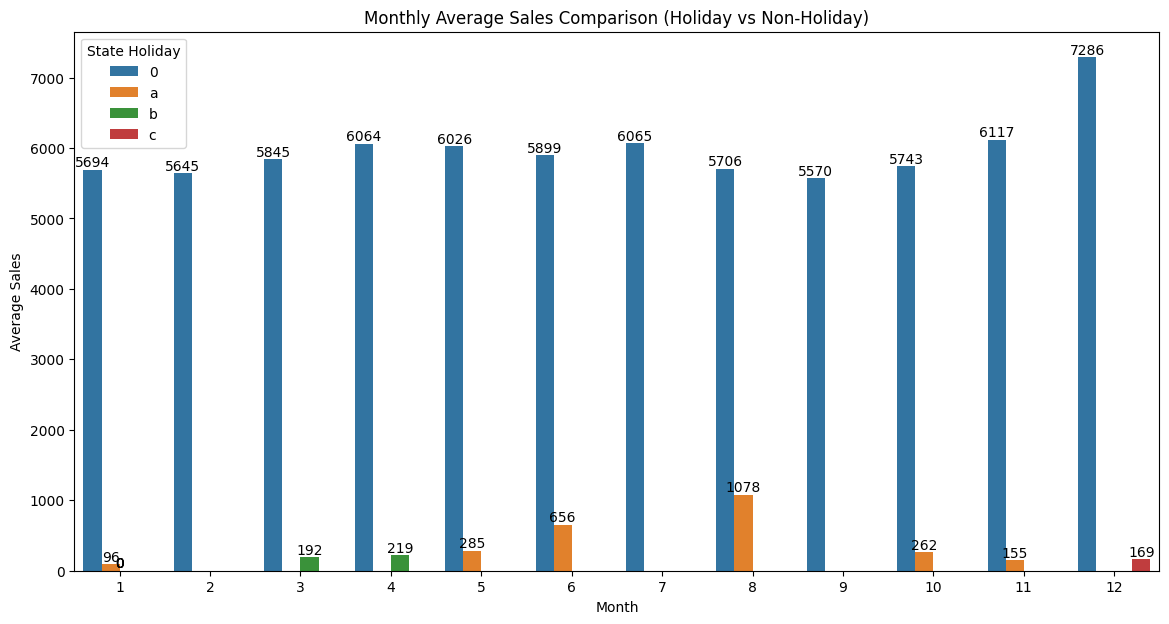

In [103]:
# Bar plot with data labels for clarity
plt.figure(figsize=(14, 7))
barplot = sns.barplot(data=monthly_sales_state_holiday, x='Month', y='Sales', hue='StateHoliday')

# Add data labels
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 5), 
                     textcoords='offset points')

# Titles and labels
plt.title('Monthly Average Sales Comparison (Holiday vs Non-Holiday)')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.legend(title='State Holiday')
plt.show()

** Observation **

On State Holidays sales is high on month 12 as compare to other months.

In [104]:
monthly_sales_school_holiday = Data_for_train.groupby(['Month','SchoolHoliday']).agg({'Sales' : 'mean'}).reset_index()

In [105]:
monthly_sales_school_holiday

Month  SchoolHoliday        Sales
0       1              0  5494.420787
1       1              1  5285.090903
2       2              0  5520.688517
3       2              1  7095.570194
4       3              0  5595.198344
5       3              1  7772.098215
6       4              0  5749.951233
7       4              1  5705.804890
8       5              0  5408.355621
9       5              1  6630.272253
10      6              0  5674.373274
11      6              1  7064.012954
12      7              0  5351.005617
13      7              1  7163.302872
14      8              0  4589.054775
15      8              1  6584.355564
16      9              0  5503.738503
17      9              1  6438.644343
18     10              0  5190.011064
19     10              1  6415.411124
20     11              0  6027.500861
21     11              1  3675.575937
22     12              0  7197.186101
23     12              1  5713.906909

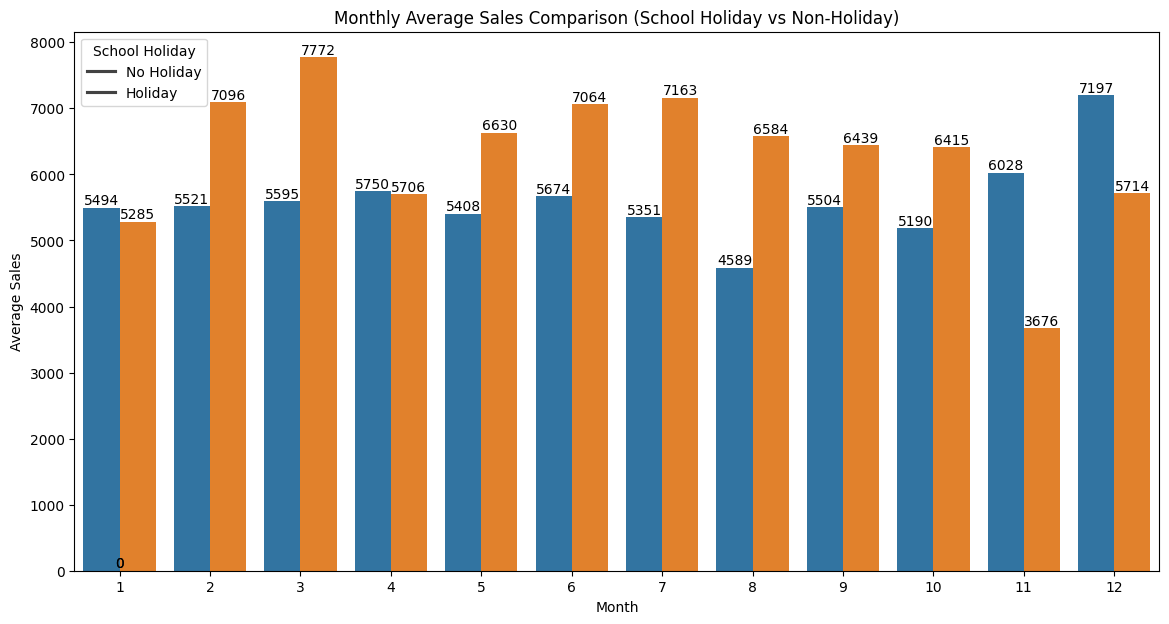

In [106]:
# Define two distinct colors for No Holiday and Holiday
custom_colors = {0: '#1f77b4', 1: '#ff7f0e'}  # Blue for No Holiday, Orange for Holiday

# Bar plot with data labels
plt.figure(figsize=(14, 7))
barplot = sns.barplot(data=monthly_sales_school_holiday, x='Month', y='Sales', hue='SchoolHoliday',palette=custom_colors)

# Add data labels on bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 5), 
                     textcoords='offset points')

# Titles and labels
plt.title('Monthly Average Sales Comparison (School Holiday vs Non-Holiday)')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.legend(title='School Holiday', labels=['No Holiday', 'Holiday'])
plt.show()

**Observation**

On month of 3 sales is preety much high on Holidays compare to other months

In [107]:
# Grouping data by Month and Promo to see combined effect on Sales
monthly_sales_promo = Data_for_train.groupby(['Month', 'Promo'])['Sales'].mean().reset_index()

In [108]:
monthly_sales_promo

Month  Promo         Sales
0       1      0   4154.433175
1       1      1   7637.813837
2       2      0   4477.680801
3       2      1   7746.883378
4       3      0   4246.012246
5       3      1   8011.451617
6       4      0   4266.077711
7       4      1   7948.050722
8       5      0   4361.203367
9       5      1   7276.331266
10      6      0   4362.027708
11      6      1   8177.309526
12      7      0   4500.161489
13      7      1   8231.498481
14      8      0   4407.173499
15      8      1   7860.176928
16      9      0   4242.340072
17      9      1   7893.042646
18     10      0   4486.168468
19     10      1   7351.764772
20     11      0   4530.903262
21     11      1   8139.575611
22     12      0   5081.764297
23     12      1  10490.790244

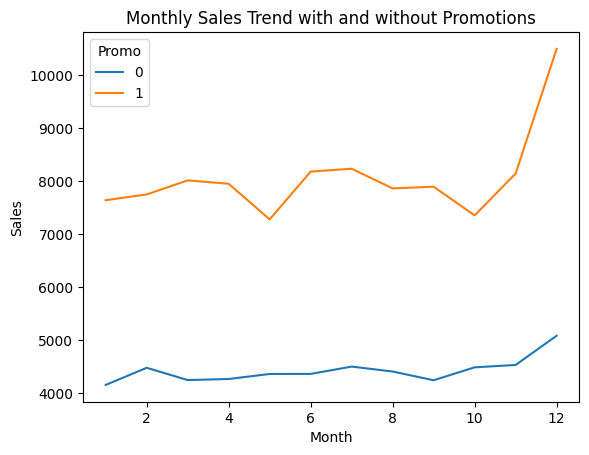

In [109]:
# Line plot to observe monthly sales trends with/without promotions
sns.lineplot(x='Month', y='Sales', hue='Promo', data=monthly_sales_promo)
plt.title('Monthly Sales Trend with and without Promotions')
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [110]:
merged_data = pd.merge(Data_for_train, Data_for_store, on='Store', how='left')

In [111]:
merged_data.head(5)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  Year  ...  StoreType  Assortment  CompetitionDistance  \
0              1  2015  ...          c           a               1270.0   
1              1  2015  ...          a           a                570.0   
2              1  2015  ...          a           a              14130.0   
3              1  2015  ...          c           c                620.0   
4              1  2015  ...          a           a              29910.0   

   CompetitionOpenSinceMonth CompetitionOpenSinceYear Promo2  Promo2SinceWeek  \
0                        9.0                   2008.0      0              0.0   
1                       11.0                   2007.0      1             13.0   
2                       12.0                   2006.0      1             14.0   
3                        9.0                   2009.0      0              0.0   
4                        4.0                   2015.0      0              0.0   

   Promo2SinceYear    PromoInterval  CompetitionDistance_Binned  
0              0.0     No Promotion                    Moderate  
1           2010.0  Jan,Apr,Jul,Oct                        Near  
2           2011.0  Jan,Apr,Jul,Oct                         Far  
3              0.0     No Promotion                        Near  
4              0.0     No Promotion                         Far  

[5 rows x 24 columns]

In [112]:
Data_for_store.shape

(1115, 11)

In [113]:
Data_for_train.shape

(1017209, 14)

In [114]:
merged_data.isna().sum()

Store                            0
DayOfWeek                        0
Date                             0
Sales                            0
Customers                        0
Open                             0
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
Year                             0
Month                            0
Day                              0
WeekOfYear                       0
IsHoliday                        0
StoreType                        0
Assortment                       0
CompetitionDistance              0
CompetitionOpenSinceMonth        0
CompetitionOpenSinceYear         0
Promo2                           0
Promo2SinceWeek                  0
Promo2SinceYear                  0
PromoInterval                    0
CompetitionDistance_Binned    2642
dtype: int64

In [115]:
# Ensure column is categorical and add "Unknown" as a valid category
merged_data['CompetitionDistance_Binned'] = merged_data['CompetitionDistance_Binned'].astype('category')
merged_data['CompetitionDistance_Binned'] = merged_data['CompetitionDistance_Binned'].cat.add_categories("Unknown")

In [116]:
# Fill missing values properly (avoiding chained assignment)
merged_data.loc[:, 'CompetitionDistance_Binned'] = merged_data['CompetitionDistance_Binned'].fillna("Unknown")

In [117]:
merged_data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'IsHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'CompetitionDistance_Binned'],
      dtype='object')

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [118]:
Data_for_test = pd.read_csv(file_path_for_test_data)

In [119]:
Data_for_test.head(5)

Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  9/17/2015   1.0      1            0              0
1   2      3          4  9/17/2015   1.0      1            0              0
2   3      7          4  9/17/2015   1.0      1            0              0
3   4      8          4  9/17/2015   1.0      1            0              0
4   5      9          4  9/17/2015   1.0      1            0              0

In [120]:
Data_for_test.dtypes

Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

In [121]:
# Check the null Values
Data_for_test.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [122]:
# Fill null values with 0
Data_for_test['Open'].fillna(0)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
41083    1.0
41084    1.0
41085    1.0
41086    1.0
41087    1.0
Name: Open, Length: 41088, dtype: float64

In [123]:
Data_for_test.isna().sum()

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

In [124]:
Data_for_test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [125]:
# Convert 'Date' to datetime format
Data_for_test['Date'] = pd.to_datetime(Data_for_test['Date'])

In [126]:
Data_for_test['Year'] = Data_for_test['Date'].dt.year
Data_for_test['Month'] = Data_for_test['Date'].dt.month
Data_for_test['Day'] = Data_for_test['Date'].dt.day
Data_for_test['WeekOfYear'] = Data_for_test['Date'].dt.isocalendar().week
Data_for_test['IsHoliday'] = Data_for_test['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

In [127]:
Data_for_test.head(5)

Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  SchoolHoliday  \
0   1      1          4 2015-09-17   1.0      1            0              0   
1   2      3          4 2015-09-17   1.0      1            0              0   
2   3      7          4 2015-09-17   1.0      1            0              0   
3   4      8          4 2015-09-17   1.0      1            0              0   
4   5      9          4 2015-09-17   1.0      1            0              0   

   Year  Month  Day  WeekOfYear  IsHoliday  
0  2015      9   17          38          0  
1  2015      9   17          38          0  
2  2015      9   17          38          0  
3  2015      9   17          38          0  
4  2015      9   17          38          0

In [128]:
Data_for_test.to_csv("./rossmann-store-sales/test_data.csv", index=False)

In [129]:
Data_for_test.dtypes

Id                        int64
Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Open                    float64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
Year                      int32
Month                     int32
Day                       int32
WeekOfYear               UInt32
IsHoliday                 int64
dtype: object

In [130]:
numerical_columns = Data_for_test.select_dtypes(include=['int64', 'float64', 'int32', 'UInt32']).columns.tolist()

In [131]:
numerical_columns

['Id',
 'Store',
 'DayOfWeek',
 'Open',
 'Promo',
 'SchoolHoliday',
 'Year',
 'Month',
 'Day',
 'WeekOfYear',
 'IsHoliday']

In [132]:
correlation_matrix_test = Data_for_test[numerical_columns].corr()

In [133]:
correlation_matrix_test

Id         Store     DayOfWeek      Open         Promo  \
Id             1.000000  2.083250e-02  5.483047e-02 -0.049313 -1.690971e-02   
Store          0.020833  1.000000e+00 -5.032372e-17  0.000818 -3.682700e-16   
DayOfWeek      0.054830 -5.032372e-17  1.000000e+00 -0.610797 -4.355177e-01   
Open          -0.049313  8.182058e-04 -6.107974e-01  1.000000  3.325565e-01   
Promo         -0.016910 -3.682700e-16 -4.355177e-01  0.332556  1.000000e+00   
SchoolHoliday  0.387661 -1.175748e-02 -3.529484e-01  0.278293  2.192020e-01   
Year                NaN           NaN           NaN       NaN           NaN   
Month         -0.828371  4.338559e-15 -5.718521e-02  0.063825  1.132006e-01   
Day           -0.185707  4.368144e-16  1.042547e-02 -0.031091 -1.709223e-01   
WeekOfYear    -0.989560  4.616005e-15 -1.967091e-01  0.135719  7.882473e-02   
IsHoliday      0.085391 -1.409955e-16  8.683757e-01 -0.486457 -4.248564e-01   

               SchoolHoliday  Year         Month           Day    WeekOfYear  \
Id                  0.387661   NaN -8.283706e-01 -1.857073e-01 -9.895595e-01   
Store              -0.011757   NaN  4.338559e-15  4.368144e-16  4.616005e-15   
DayOfWeek          -0.352948   NaN -5.718521e-02  1.042547e-02 -1.967091e-01   
Open                0.278293   NaN  6.382535e-02 -3.109078e-02  1.357190e-01   
Promo               0.219202   NaN  1.132006e-01 -1.709223e-01  7.882473e-02   
SchoolHoliday       1.000000   NaN -3.426023e-01 -3.498174e-02 -3.305616e-01   
Year                     NaN   NaN           NaN           NaN           NaN   
Month              -0.342602   NaN  1.000000e+00 -3.962692e-01  8.217559e-01   
Day                -0.034982   NaN -3.962692e-01  1.000000e+00  1.809036e-01   
WeekOfYear         -0.330562   NaN  8.217559e-01  1.809036e-01  1.000000e+00   
IsHoliday          -0.303724   NaN -9.572029e-02  2.792723e-02 -2.079209e-01   

                  IsHoliday  
Id             8.539126e-02  
Store         -1.409955e-16  
DayOfWeek      8.683757e-01  
Open          -4.864573e-01  
Promo         -4.248564e-01  
SchoolHoliday -3.037236e-01  
Year                    NaN  
Month         -9.572029e-02  
Day            2.792723e-02  
WeekOfYear    -2.079209e-01  
IsHoliday      1.000000e+00

In [134]:
# Calculating skewness for all numerical columns
skewness_test = Data_for_test[numerical_columns].skew()
print(skewness_test)

Id                    0.0
Store            0.010899
DayOfWeek        0.028468
Open            -2.008802
Promo             0.42603
SchoolHoliday    0.227518
Year                  0.0
Month            0.609872
Day              0.408154
WeekOfYear       0.000758
IsHoliday        0.338074
dtype: Float64


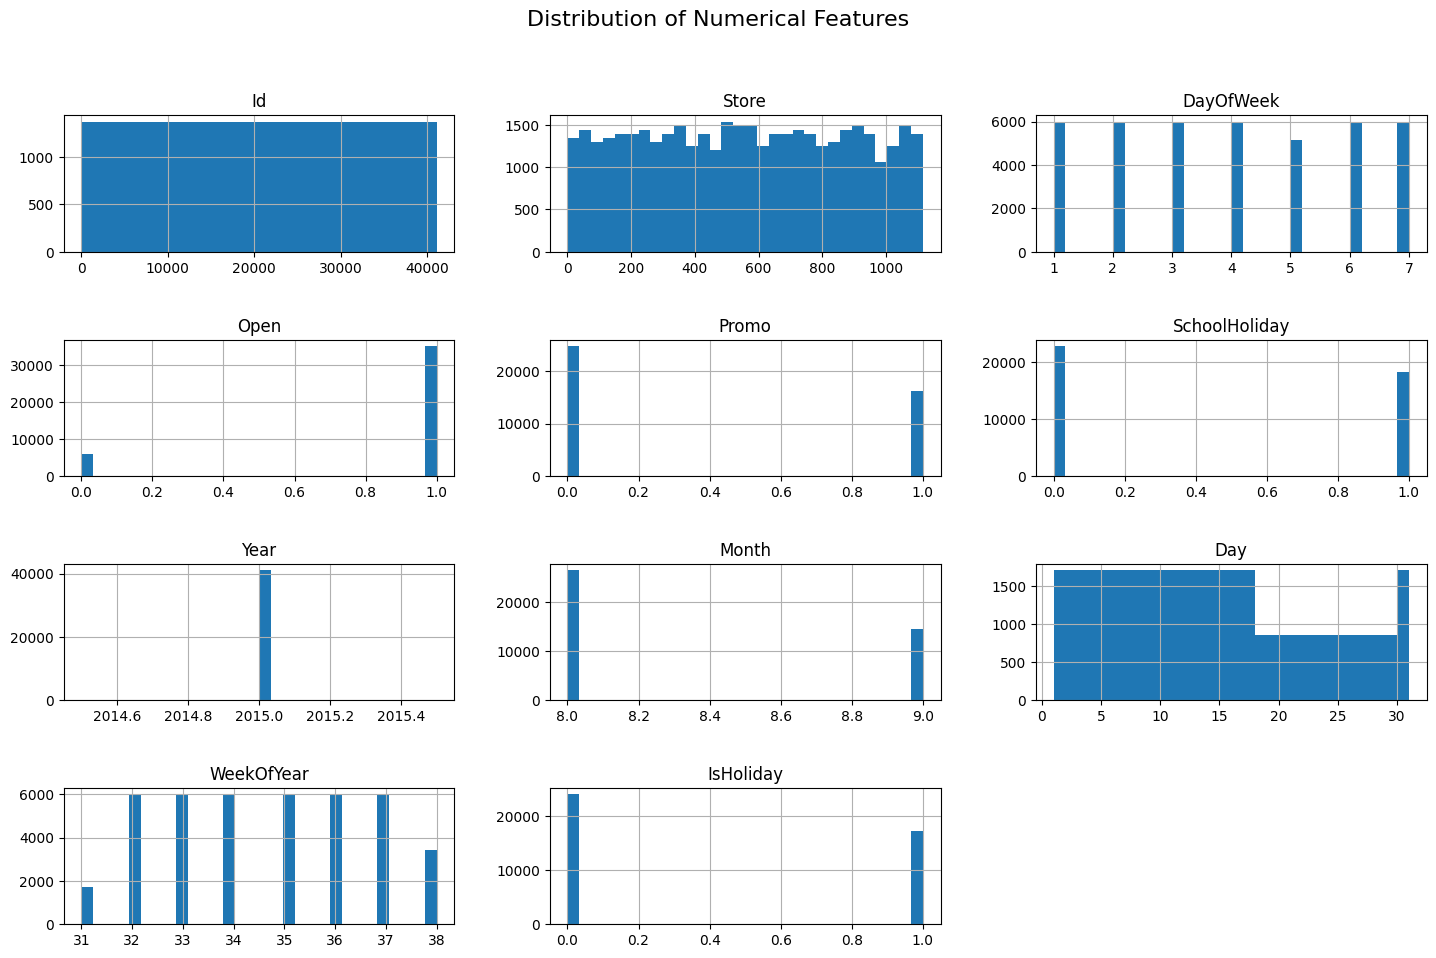

In [135]:
# Plotting histograms for all numerical columns
Data_for_test[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout(pad=3.0)
plt.show()

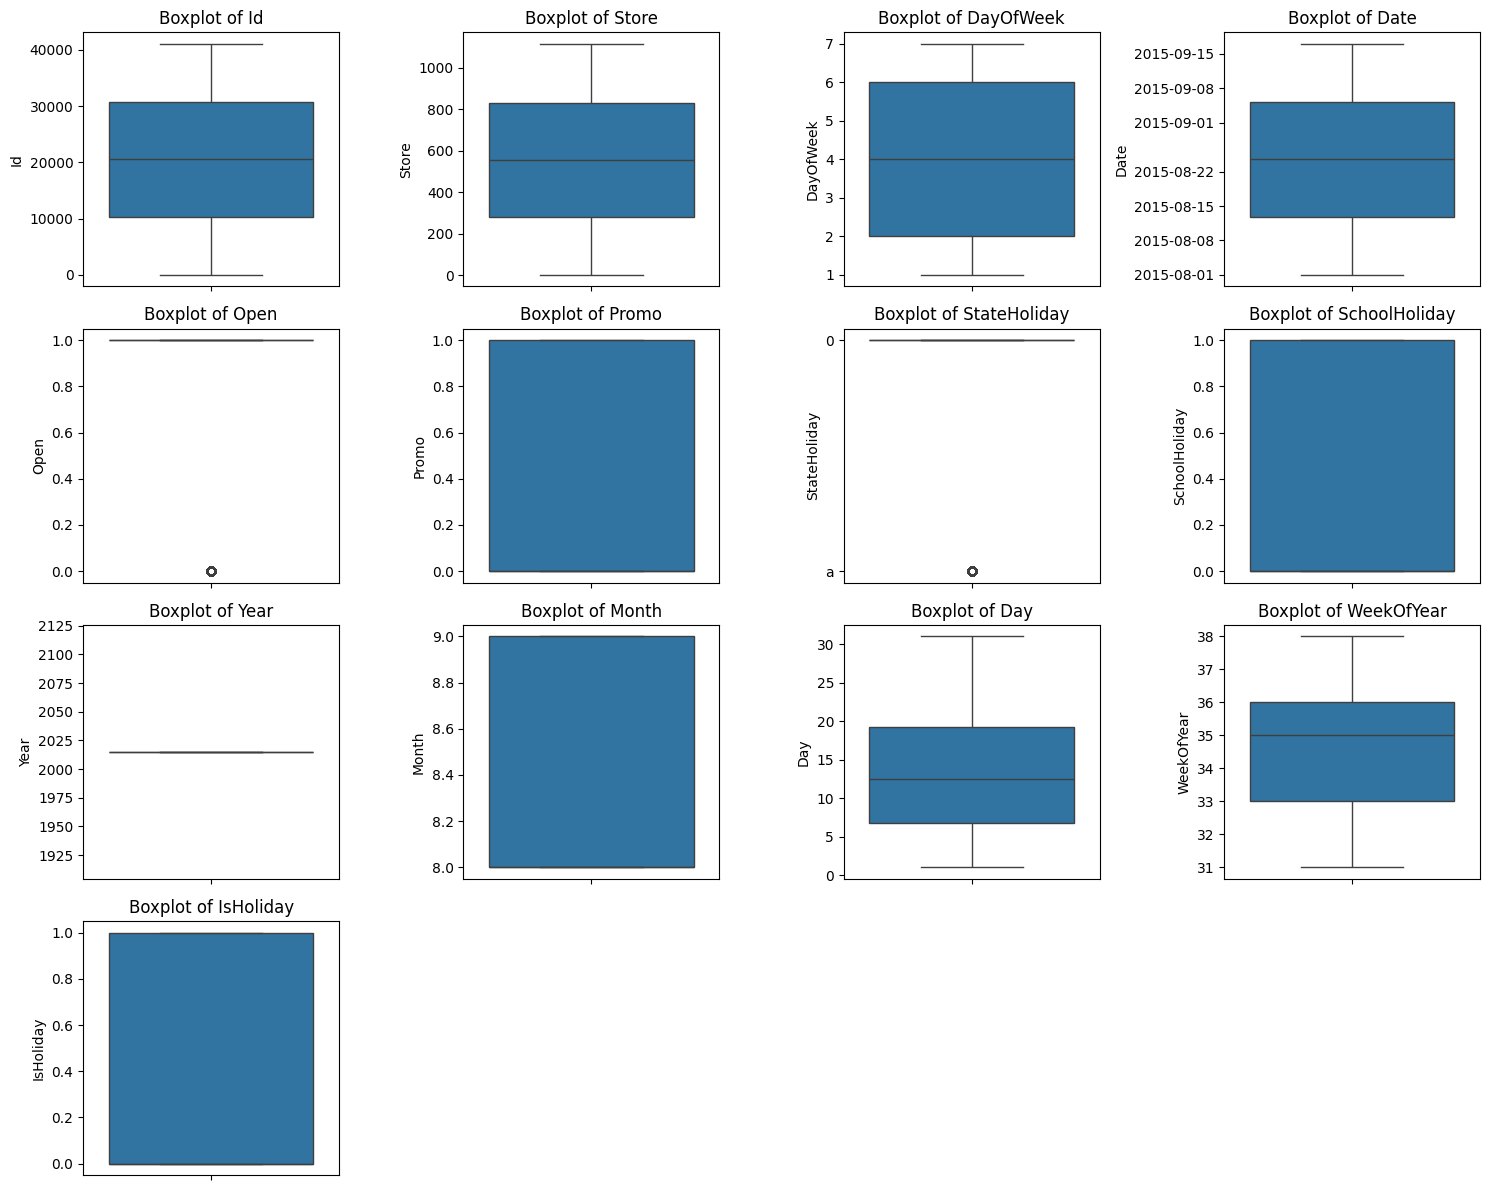

In [136]:
# Checking for outliers
plt.figure(figsize=(15, 12))  # Increase figure size

# Adjust the layout to fit 10 numerical columns in a 4x3 grid
for i, col in enumerate(Data_for_test, 1):
    plt.subplot(4, 4, i)  # Use 4 rows, 3 columns to fit 10 plots
    sns.boxplot(y=Data_for_test[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

EDA On merge data

In [137]:
# Compute average sales with and without promotion
promo_sales_comparison = merged_data.groupby("Promo")["Sales"].mean().reset_index()
promo_sales_comparison.columns = ["Promo", "Avg_Sales"]

In [138]:
promo_sales_comparison

Promo    Avg_Sales
0      0  4406.050805
1      1  7991.152046

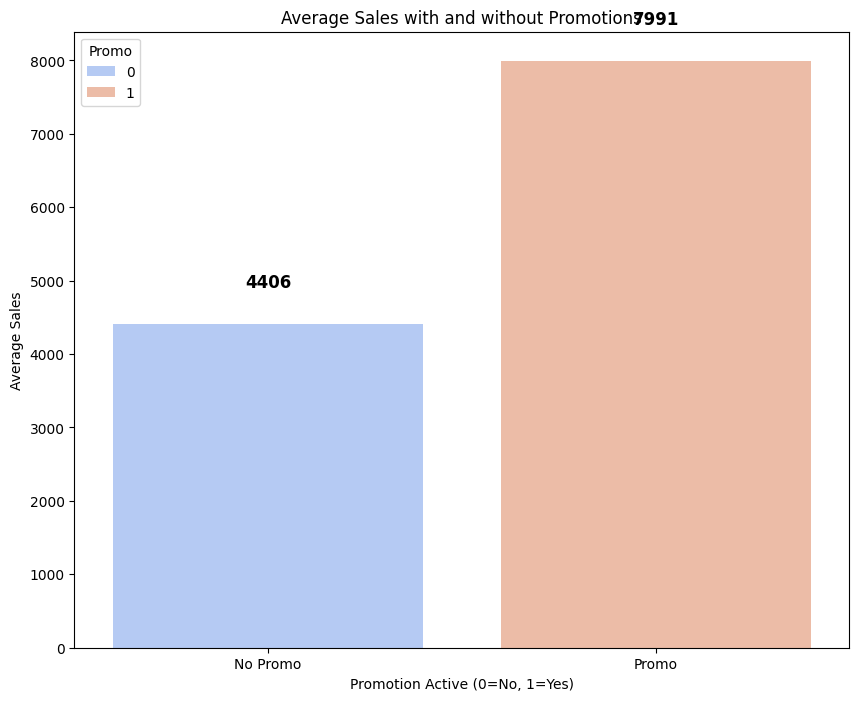

In [139]:
plt.figure(figsize=(10, 8))
sns.barplot(data=promo_sales_comparison, x="Promo", y="Avg_Sales", palette="coolwarm", hue  = 'Promo')

# Add labels on bars
for index, row in promo_sales_comparison.iterrows():
    plt.text(index, row["Avg_Sales"] + 500, f"{row['Avg_Sales']:.0f}", ha='center', fontsize=12, fontweight='bold')

# Titles and labels
plt.title("Average Sales with and without Promotions")
plt.xlabel("Promotion Active (0=No, 1=Yes)")
plt.ylabel("Average Sales")
plt.xticks(ticks=[0, 1], labels=['No Promo', 'Promo'])

# Show the plot
plt.show()

How does Promo2 (long-term promo) affect sales?

In [140]:
# Compute average sales with and without long-term promotions
promo2_sales_comparison = merged_data.groupby("Promo2")["Sales"].mean().reset_index()
promo2_sales_comparison.columns = ["Promo2", "Avg_Sales"]

In [141]:
promo2_sales_comparison

Promo2    Avg_Sales
0       0  6124.710161
1       1  5423.718218

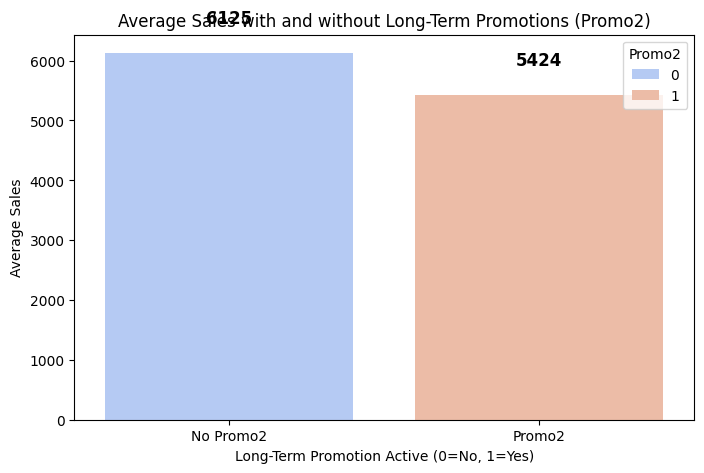

In [142]:
plt.figure(figsize=(8, 5))
sns.barplot(data=promo2_sales_comparison, x="Promo2", y="Avg_Sales", palette="coolwarm", hue='Promo2')

# Add labels on bars
for index, row in promo2_sales_comparison.iterrows():
    plt.text(index, row["Avg_Sales"] + 500, f"{row['Avg_Sales']:.0f}", ha='center', fontsize=12, fontweight='bold')

# Titles and labels
plt.title("Average Sales with and without Long-Term Promotions (Promo2)")
plt.xlabel("Long-Term Promotion Active (0=No, 1=Yes)")
plt.ylabel("Average Sales")
plt.xticks(ticks=[0, 1], labels=['No Promo2', 'Promo2'])

# Show the plot
plt.show()

 Which stores benefit most from promotions?

In [143]:
store_promo_sales = merged_data.groupby(['Store', 'Promo'])['Sales'].mean().unstack()

In [144]:
store_promo_sales

Promo             0             1
Store                            
1       3198.994845   5152.886111
2       2855.058419   6172.816667
3       3967.596220   8608.666667
4       6568.939863  10370.511111
5       2582.271478   5944.266667
...             ...           ...
1111    3073.487973   6395.294444
1112    5975.537801  12490.363889
1113    4400.362543   7320.086111
1114   14477.742268  21601.497222
1115    4082.221649   7073.266667

[1115 rows x 2 columns]

In [145]:
# Compute percentage increase due to promotions
store_promo_sales['Promo_Effect'] = ((store_promo_sales[1] - store_promo_sales[0]) / store_promo_sales[0]) * 100

In [146]:
store_promo_sales['Promo_Effect'] = round(store_promo_sales['Promo_Effect'],2)

In [147]:
store_promo_sales

Promo             0             1  Promo_Effect
Store                                          
1       3198.994845   5152.886111         61.08
2       2855.058419   6172.816667        116.21
3       3967.596220   8608.666667        116.97
4       6568.939863  10370.511111         57.87
5       2582.271478   5944.266667        130.20
...             ...           ...           ...
1111    3073.487973   6395.294444        108.08
1112    5975.537801  12490.363889        109.02
1113    4400.362543   7320.086111         66.35
1114   14477.742268  21601.497222         49.20
1115    4082.221649   7073.266667         73.27

[1115 rows x 3 columns]

In [148]:
# Sort by highest promo effect
top_promo_stores = store_promo_sales.sort_values(by='Promo_Effect', ascending=False).head(20)

In [149]:
top_promo_stores

Promo            0             1  Promo_Effect
Store                                         
198    1292.500000   4211.216667        225.82
607    1880.798969   5435.191667        188.98
543    1383.443299   3817.008333        175.91
575    2664.858051   7294.339161        173.72
271    4009.890034  10507.675000        162.04
693    3390.144330   8854.822222        161.19
96     2675.621993   6891.002778        157.55
1108   2976.214777   7640.116667        156.71
552    4008.190722  10272.252778        156.28
635    3065.690722   7847.163889        155.97
489    3791.017182   9701.652778        155.91
286    2561.649485   6521.922222        154.60
898    3453.493127   8787.047222        154.44
156    3682.060137   9169.502778        149.03
695    2856.053265   7052.833333        146.94
261    6694.369416  16478.113889        146.15
972    1637.080756   4027.350000        146.01
72     2346.733051   5755.307692        145.25
88     3207.804124   7866.988889        145.25
581    2837.711340   6953.941667        145.05

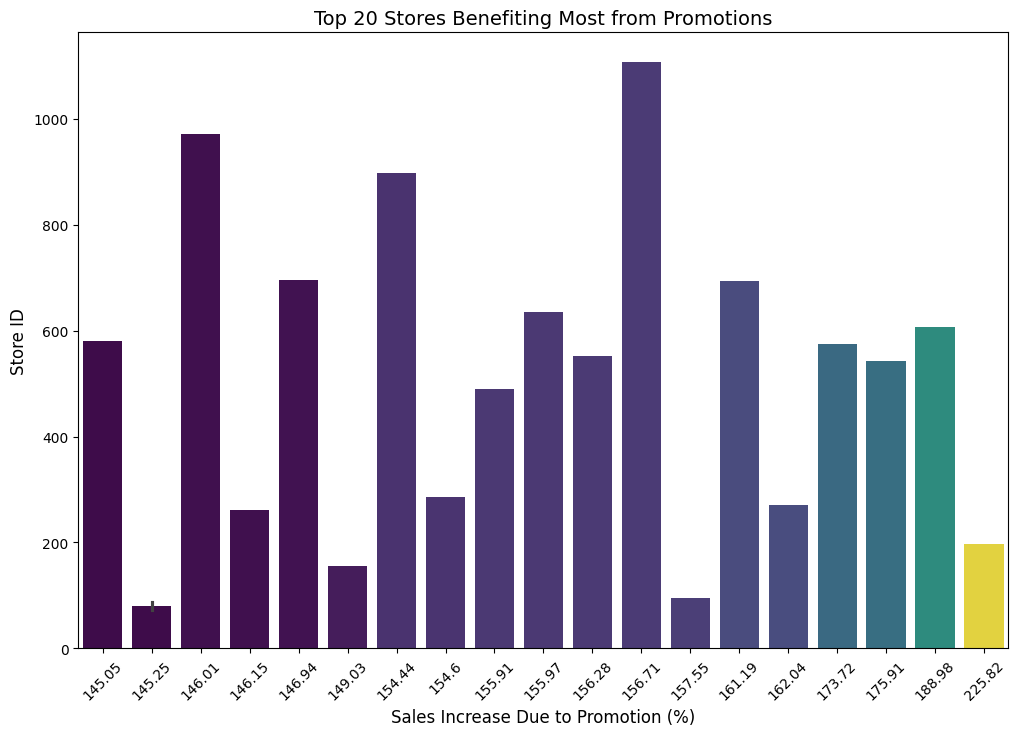

In [150]:
# Alternative plot using a horizontal bar chart for better readability

plt.figure(figsize=(12, 8))
sns.barplot(data=top_promo_stores, y="Store", x="Promo_Effect", palette="viridis", legend= False,  hue ='Promo_Effect')

# # Add labels on bars
# for index, row in top_promo_stores.iterrows():
#     plt.text(row["Promo_Effect"] + 1, index, f"{row['Promo_Effect']:.1f}%", ha='right', fontsize=10, fontweight='bold')

# Titles and labels
plt.title("Top 20 Stores Benefiting Most from Promotions", fontsize=14)
plt.ylabel("Store ID", fontsize=12)
plt.xlabel("Sales Increase Due to Promotion (%)", fontsize=12)
plt.xticks(rotation=45)

# Show the plot
plt.show()


Does Competition Distance Affect Sales?

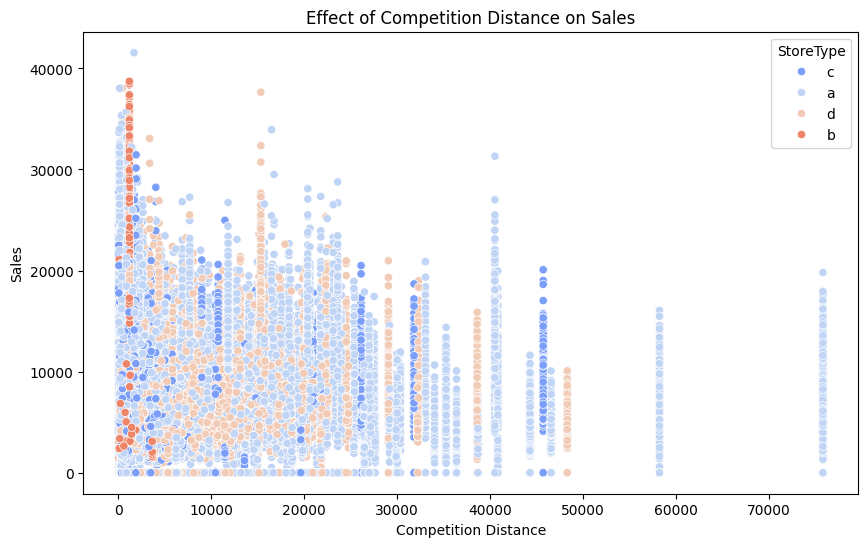

In [151]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x="CompetitionDistance", y="Sales", hue="StoreType", palette="coolwarm")

# Titles and labels
plt.title("Effect of Competition Distance on Sales")
plt.xlabel("Competition Distance")
plt.ylabel("Sales")
plt.show()

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Exploratory Data Analysis

In [152]:
Data_for_train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'IsHoliday'],
      dtype='object')

In [153]:
Data_for_test.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 'IsHoliday'],
      dtype='object')

Check for distribution in both training and test sets - are the promotions
distributed similarly between these two groups?

In [154]:
# Check the distribution of promotions in both datasets
promo_distribution_train = Data_for_train['Promo'].value_counts(normalize=True) * 100
promo_distribution_test = Data_for_test['Promo'].value_counts(normalize=True) * 100

In [155]:
promo_distribution_train,promo_distribution_test

(Promo
 0    61.848548
 1    38.151452
 Name: proportion, dtype: float64,
 Promo
 0    60.416667
 1    39.583333
 Name: proportion, dtype: float64)

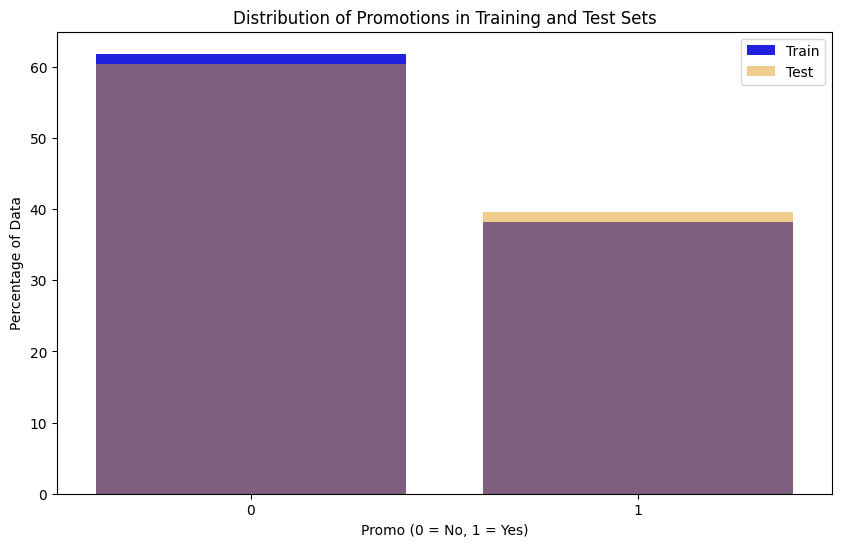

In [156]:
# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=promo_distribution_train.index, y=promo_distribution_train.values, color='blue', label='Train')
sns.barplot(x=promo_distribution_test.index, y=promo_distribution_test.values, color='orange', alpha=0.5, label='Test')

plt.title('Distribution of Promotions in Training and Test Sets')
plt.xlabel('Promo (0 = No, 1 = Yes)')
plt.ylabel('Percentage of Data')
plt.legend()
plt.show()


**Observation**

-The promotion distribution is fairly consistent between the training and test sets.

-This suggests that the model trained on the training set should generalize well in terms of promotional patterns when applied to the test set.

Check & compare sales behavior before, during and after holidays

In [157]:
# Convert 'Date' to datetime format for easier manipulation
Data_for_train['Date'] = pd.to_datetime(Data_for_train['Date'])

In [158]:
# Create a combined holiday flag (1 if either state or school holiday)
Data_for_train['HolidayFlag'] = Data_for_train.apply(
    lambda row: 1 if (row['StateHoliday'] in ['1', '2', '3']) or (row['SchoolHoliday'] == 1) else 0, axis=1)

In [159]:
Data_for_train['HolidayFlag']

0          1
1          1
2          1
3          1
4          1
          ..
1017204    1
1017205    1
1017206    1
1017207    1
1017208    1
Name: HolidayFlag, Length: 1017209, dtype: int64

In [160]:
Data_for_train['HolidayFlag'].unique()

array([1, 0])

In [161]:
# Identify days before and after holidays
Data_for_train['BeforeHoliday'] = Data_for_train['HolidayFlag'].shift(-1).fillna(0).astype(int)
Data_for_train['AfterHoliday'] = Data_for_train['HolidayFlag'].shift(1).fillna(0).astype(int)

In [162]:
Data_for_train['BeforeHoliday']

0          1
1          1
2          1
3          1
4          1
          ..
1017204    1
1017205    1
1017206    1
1017207    1
1017208    0
Name: BeforeHoliday, Length: 1017209, dtype: int64

In [163]:
# Categorize each day as 'Before', 'During', 'After', or 'Regular'
def categorize_holiday(row):
    if row['HolidayFlag'] == 1:
        return 'During Holiday'
    elif row['BeforeHoliday'] == 1:
        return 'Before Holiday'
    elif row['AfterHoliday'] == 1:
        return 'After Holiday'
    else:
        return 'Regular Day'

In [164]:

Data_for_train['HolidayPeriod'] = Data_for_train.apply(categorize_holiday, axis=1)

In [165]:
Data_for_train['HolidayPeriod'].unique()

array(['During Holiday', 'Before Holiday', 'After Holiday', 'Regular Day'],
      dtype=object)

In [166]:
Data_for_train.head(5)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  Year  Month  Day  WeekOfYear  IsHoliday  HolidayFlag  \
0              1  2015      7   31          31          1            1   
1              1  2015      7   31          31          1            1   
2              1  2015      7   31          31          1            1   
3              1  2015      7   31          31          1            1   
4              1  2015      7   31          31          1            1   

   BeforeHoliday  AfterHoliday   HolidayPeriod  
0              1             0  During Holiday  
1              1             1  During Holiday  
2              1             1  During Holiday  
3              1             1  During Holiday  
4              1             1  During Holiday

In [167]:
# Group by the holiday period and calculate average sales
holiday_sales_behavior = Data_for_train.groupby('HolidayPeriod')['Sales'].mean().reset_index()

In [168]:
holiday_sales_behavior

HolidayPeriod        Sales
0   After Holiday  6617.956818
1  Before Holiday  6747.082460
2  During Holiday  6476.522207
3     Regular Day  5474.808675

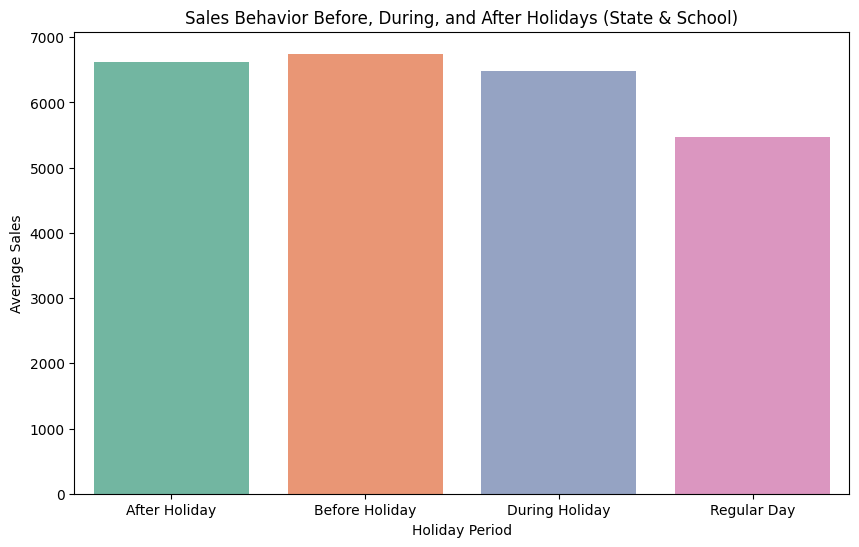

In [169]:
# Plotting the sales behavior before, during, and after holidays
plt.figure(figsize=(10, 6))
sns.barplot(x='HolidayPeriod', y='Sales', data=holiday_sales_behavior, palette='Set2', hue='HolidayPeriod')
plt.title('Sales Behavior Before, During, and After Holidays (State & School)')
plt.xlabel('Holiday Period')
plt.ylabel('Average Sales')
plt.show()


**Observation**

Sale is more as compare to Regular day , but sale is even high after and before holidays as compare to on the particular day.

Find out any seasonal (Christmas, Easter etc) purchase behaviours

In [170]:
# Define seasonal periods for Christmas and Easter
def identify_season(row):
    # Christmas Season: December (Month 12)
    if row['Month'] == 12:
        return 'Christmas Season'
    # Easter Season: Typically falls between March and April
    elif row['Month'] in [3, 4]:
        return 'Easter Season'
    else:
        return 'Regular Season'

In [171]:
# Apply the season identification function
Data_for_train['Season'] = Data_for_train.apply(identify_season, axis=1)


In [172]:
# Group by season to calculate average sales
seasonal_sales_behavior = Data_for_train.groupby('Season')['Sales'].mean().reset_index()

In [173]:
seasonal_sales_behavior

Season        Sales
0  Christmas Season  6826.611377
1     Easter Season  5762.097581
2    Regular Season  5687.756991

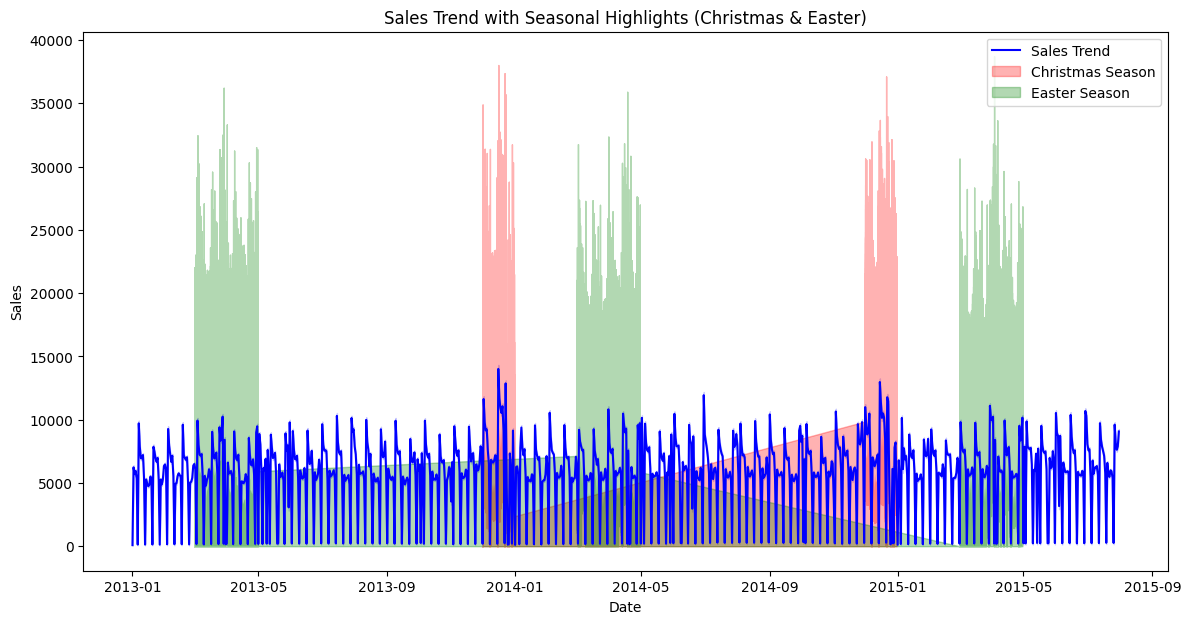

In [174]:
# Plotting sales trends over time with seasons highlighted
plt.figure(figsize=(14, 7))
sns.lineplot(data=Data_for_train, x='Date', y='Sales', label='Sales Trend', color='blue')

# Highlighting Christmas Season
christmas = Data_for_train[Data_for_train['Season'] == 'Christmas Season']
plt.fill_between(christmas['Date'], christmas['Sales'], alpha=0.3, color='red', label='Christmas Season')

# Highlighting Easter Season
easter = Data_for_train[Data_for_train['Season'] == 'Easter Season']
plt.fill_between(easter['Date'], easter['Sales'], alpha=0.3, color='green', label='Easter Season')

plt.title('Sales Trend with Seasonal Highlights (Christmas & Easter)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


What can you say about the correlation between sales and number of
customers?

In [175]:
# Calculate Pearson correlation between Sales and Customers
correlation = Data_for_train[['Sales', 'Customers']].corr().iloc[0, 1]

In [176]:
print(f"Correlation between Sales and Customers: {correlation:.2f}")

Correlation between Sales and Customers: 0.89


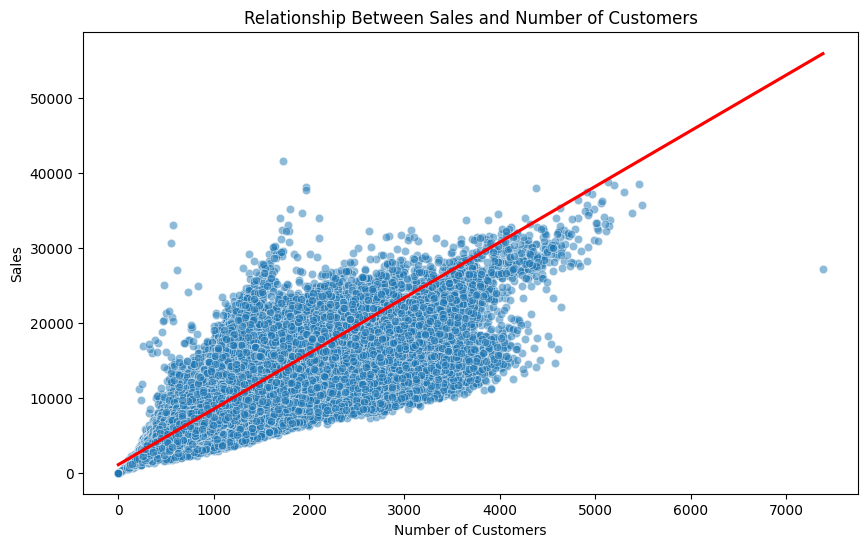

In [177]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=Data_for_train, alpha=0.5)

# Add a trendline to see the correlation more clearly
sns.regplot(x='Customers', y='Sales', data=Data_for_train, scatter=False, color='red')

plt.title('Relationship Between Sales and Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

How does promo affect sales? Are the promos attracting more customers? How
does it affect already existing customers?

In [178]:
# Group by Promo to calculate average sales
promo_sales_comparison = Data_for_train.groupby('Promo')['Sales'].mean().reset_index()

In [179]:
promo_sales_comparison

Promo        Sales
0      0  4406.050805
1      1  7991.152046

In [180]:
# Group by Promo to calculate average number of customers
promo_customers_comparison = Data_for_train.groupby('Promo')['Customers'].mean().reset_index()

In [181]:
promo_customers_comparison

Promo   Customers
0      0  517.823542
1      1  820.098815

In [182]:
# Calculate average sales per customer during promotions and non-promotions
Data_for_train['SalesPerCustomer'] = Data_for_train['Sales'] / Data_for_train['Customers']

In [183]:
# Group by Promo to analyze sales per customer
promo_sales_per_customer = Data_for_train.groupby('Promo')['SalesPerCustomer'].mean().reset_index()

In [184]:
promo_sales_per_customer

Promo  SalesPerCustomer
0      0          8.941128
1      1         10.178907

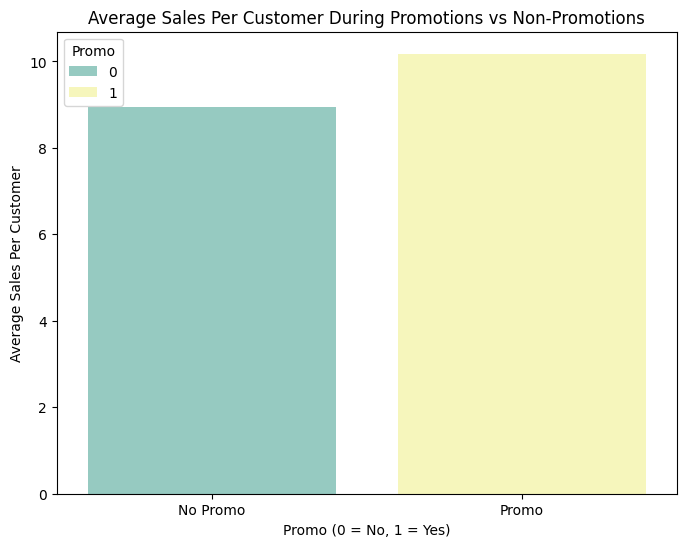

In [185]:
# Plotting the average sales per customer
plt.figure(figsize=(8, 6))
sns.barplot(x='Promo', y='SalesPerCustomer', data=promo_sales_per_customer, palette='Set3', hue= 'Promo')

plt.title('Average Sales Per Customer During Promotions vs Non-Promotions')
plt.xlabel('Promo (0 = No, 1 = Yes)')
plt.ylabel('Average Sales Per Customer')
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.show()

**Observation**

- Promotions are effective in driving sales.
- Promotions are bringing in new customers.
-  Existing customers are buying more during promotions.

Could the promos be deployed in more effective ways? Which stores should
promos be deployed in?

In [186]:
# Calculate average sales during Promo and Non-Promo periods for each store
promo_effectiveness_per_store = Data_for_train.groupby(['Store', 'Promo'])['Sales'].mean().unstack().reset_index()

In [187]:
promo_effectiveness_per_store

Promo  Store             0             1
0          1   3198.994845   5152.886111
1          2   2855.058419   6172.816667
2          3   3967.596220   8608.666667
3          4   6568.939863  10370.511111
4          5   2582.271478   5944.266667
...      ...           ...           ...
1110    1111   3073.487973   6395.294444
1111    1112   5975.537801  12490.363889
1112    1113   4400.362543   7320.086111
1113    1114  14477.742268  21601.497222
1114    1115   4082.221649   7073.266667

[1115 rows x 3 columns]

In [188]:
# Calculate percentage increase in sales due to promotions
promo_effectiveness_per_store['SalesIncreasePercent'] = ((promo_effectiveness_per_store[1] - promo_effectiveness_per_store[0]) / promo_effectiveness_per_store[0]) * 100

In [189]:
promo_effectiveness_per_store

Promo  Store             0             1  SalesIncreasePercent
0          1   3198.994845   5152.886111             61.078287
1          2   2855.058419   6172.816667            116.206317
2          3   3967.596220   8608.666667            116.974364
3          4   6568.939863  10370.511111             57.871914
4          5   2582.271478   5944.266667            130.195265
...      ...           ...           ...                   ...
1110    1111   3073.487973   6395.294444            108.079371
1111    1112   5975.537801  12490.363889            109.024933
1112    1113   4400.362543   7320.086111             66.351887
1113    1114  14477.742268  21601.497222             49.204875
1114    1115   4082.221649   7073.266667             73.270030

[1115 rows x 4 columns]

In [190]:
# Display stores with the highest sales increase from promotions
promo_effectiveness_per_store_sorted = promo_effectiveness_per_store.sort_values(by='SalesIncreasePercent', ascending=False)

In [191]:
promo_effectiveness_per_store_sorted.head(5)

Promo  Store            0             1  SalesIncreasePercent
197      198  1292.500000   4211.216667            225.819471
606      607  1880.798969   5435.191667            188.983127
542      543  1383.443299   3817.008333            175.906381
574      575  2664.858051   7294.339161            173.723366
270      271  4009.890034  10507.675000            162.043969

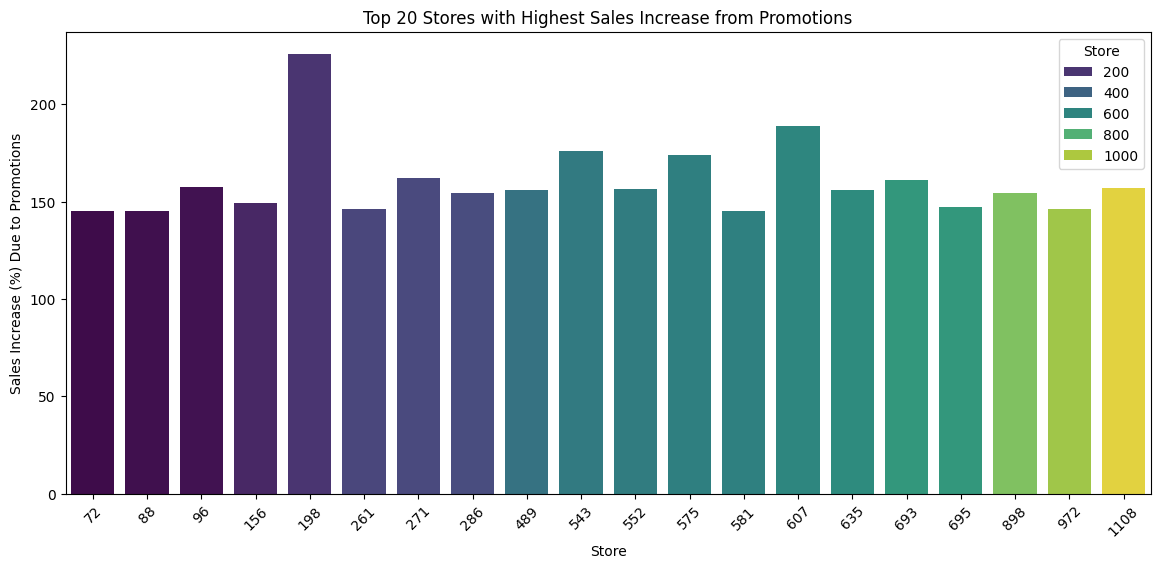

In [192]:
plt.figure(figsize=(14, 6))
sns.barplot(data=promo_effectiveness_per_store_sorted.head(20), x='Store', y='SalesIncreasePercent', palette='viridis', hue= 'Store')

plt.title('Top 20 Stores with Highest Sales Increase from Promotions')
plt.xlabel('Store')
plt.ylabel('Sales Increase (%) Due to Promotions')
plt.xticks(rotation=45)
plt.show()

In [193]:
# Merge with store information to get StoreType and Assortment
promo_store_data = pd.merge(promo_effectiveness_per_store_sorted, Data_for_store, on='Store')

In [194]:
promo_store_data.head(5)

Store            0             1  SalesIncreasePercent StoreType  \
0    198  1292.500000   4211.216667            225.819471         a   
1    607  1880.798969   5435.191667            188.983127         a   
2    543  1383.443299   3817.008333            175.906381         c   
3    575  2664.858051   7294.339161            173.723366         a   
4    271  4009.890034  10507.675000            162.043969         a   

  Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0          a                290.0                        9.0   
1          a                350.0                        8.0   
2          a               1080.0                       12.0   
3          a                960.0                        5.0   
4          a                420.0                        0.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2002.0       1             13.0           2010.0   
1                    1999.0       1             14.0           2011.0   
2                    2012.0       0              0.0              0.0   
3                    2008.0       1             13.0           2010.0   
4                       0.0       1             14.0           2011.0   

     PromoInterval CompetitionDistance_Binned  
0  Jan,Apr,Jul,Oct                       Near  
1  Jan,Apr,Jul,Oct                       Near  
2     No Promotion                   Moderate  
3  Jan,Apr,Jul,Oct                       Near  
4  Jan,Apr,Jul,Oct                       Near

In [195]:
# Analyze average sales increase by StoreType
promo_by_store_type = promo_store_data.groupby('StoreType')['SalesIncreasePercent'].mean().reset_index()

In [196]:
promo_by_store_type

StoreType  SalesIncreasePercent
0         a             91.535614
1         b             18.892811
2         c             78.765995
3         d             80.492752

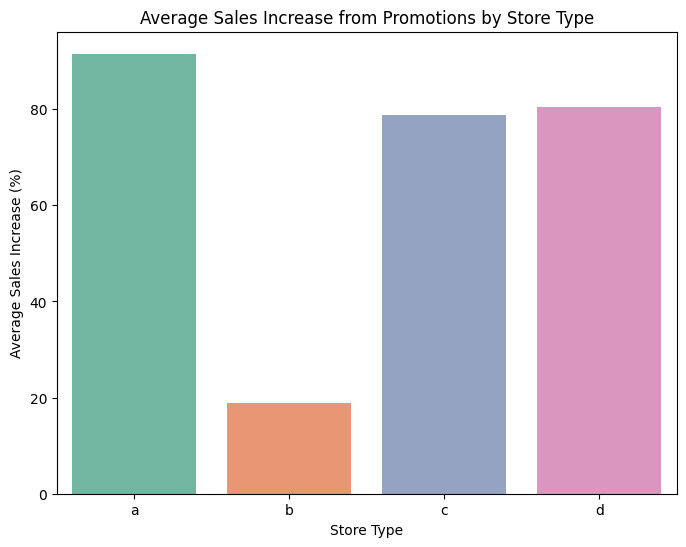

In [197]:
# Plotting the average sales increase by Store Type
plt.figure(figsize=(8, 6))
sns.barplot(data=promo_by_store_type, x='StoreType', y='SalesIncreasePercent', palette='Set2', hue= 'StoreType' )
plt.title('Average Sales Increase from Promotions by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales Increase (%)')
plt.show()

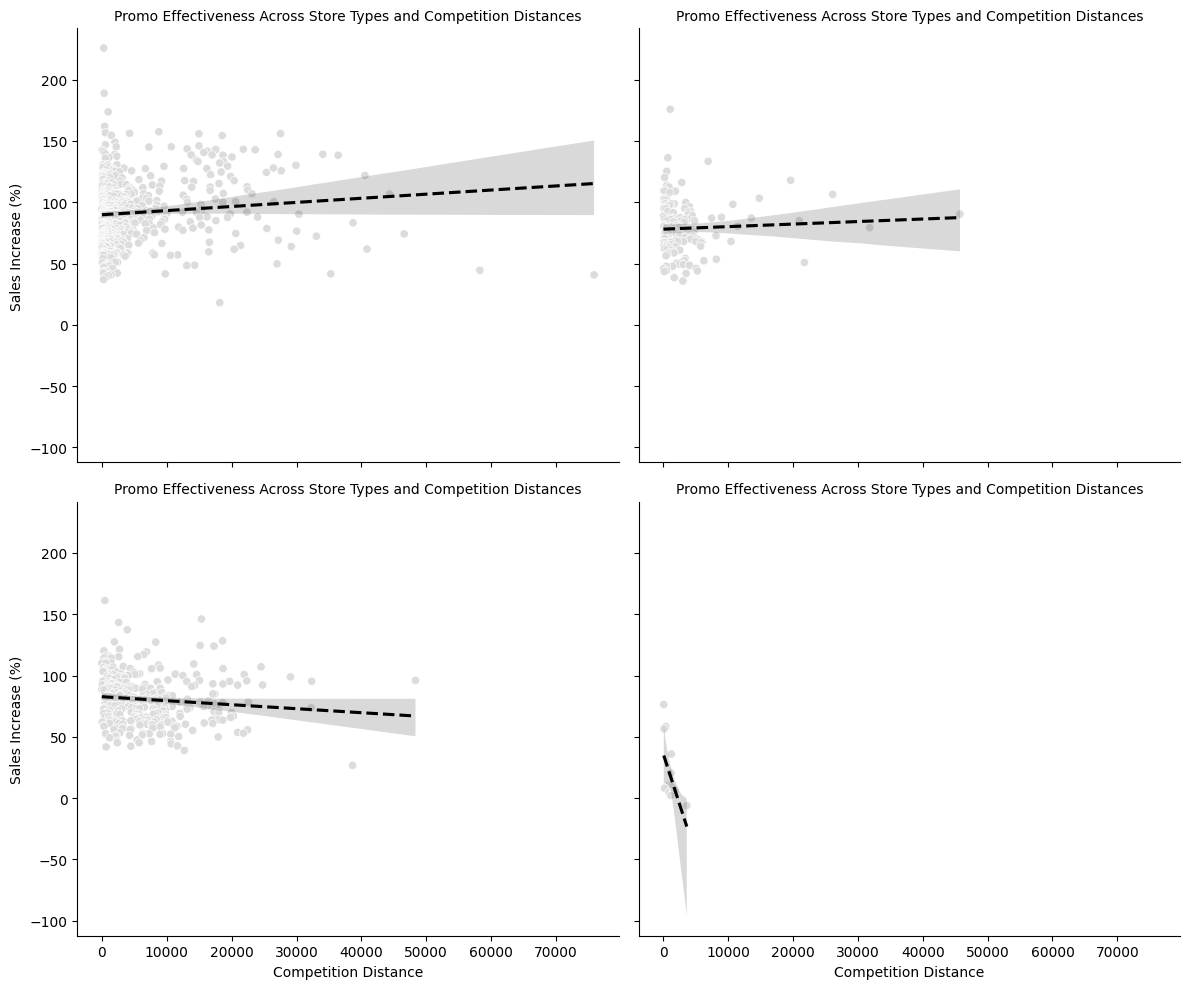

In [198]:
# FacetGrid to separate plots for each StoreType
g = sns.FacetGrid(promo_store_data, col='StoreType', col_wrap=2, height=5, aspect=1.2)
g.map_dataframe(sns.scatterplot, x='CompetitionDistance', y='SalesIncreasePercent', hue='StoreType', palette='coolwarm', legend=False)

# Adding trendlines with custom style using line_kws
g.map_dataframe(sns.regplot, x='CompetitionDistance', y='SalesIncreasePercent', scatter=False, line_kws={'color': 'black', 'linestyle': '--'})

# Adjust plot titles and labels
g.set_titles('Store Type: {col_name}')
g.set_axis_labels('Competition Distance', 'Sales Increase (%)')
g.set_titles('Promo Effectiveness Across Store Types and Competition Distances')
plt.show()

**Observation**

- Deploy promotions in stores where sales increase significantly during promo periods.
- If certain stores show little to no improvement, re-evaluate promo strategies. Try targeted promotions (e.g., loyalty programs) or reduce promo frequency in these stores.
- StoreType B performs better with promotions compared to StoreType B, focus more on similar stores.

 Recommendations for Deploying Promos More Effectively:
 - Deploy promotions to top 20% of stores where promos drive maximum sales increase.
 - Use different promo strategies (e.g., discounts, loyalty programs) for stores where promos aren’t effective.


Trends of customer behavior during store open and closing times

In [199]:
# Group by 'Open' to calculate average number of customers
open_close_customer_behavior = Data_for_train.groupby('Open').agg({'Customers' : 'mean'}).reset_index()

In [200]:
open_close_customer_behavior

Open   Customers
0     0    0.000000
1     1  762.728395

In [201]:
# Group by DayOfWeek and Open to see customer behavior trends
open_day_customer_behavior = Data_for_train.groupby(['DayOfWeek', 'Open'])['Customers'].mean().reset_index()

In [202]:
open_day_customer_behavior

DayOfWeek  Open    Customers
0           1     0     0.000000
1           1     1   855.444984
2           2     0     0.000000
3           2     1   769.986753
4           3     0     0.000000
5           3     1   740.598876
6           4     0     0.000000
7           4     1   755.569784
8           5     0     0.000000
9           5     1   781.771639
10          6     0     0.000000
11          6     1   660.177526
12          7     0     0.000000
13          7     1  1441.532424

In [203]:
# Filter data for open stores only
open_store_data = Data_for_train[Data_for_train['Open'] == 1]

In [204]:
open_store_data.head(5)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday  Year  Month  Day  WeekOfYear  IsHoliday  HolidayFlag  \
0              1  2015      7   31          31          1            1   
1              1  2015      7   31          31          1            1   
2              1  2015      7   31          31          1            1   
3              1  2015      7   31          31          1            1   
4              1  2015      7   31          31          1            1   

   BeforeHoliday  AfterHoliday   HolidayPeriod          Season  \
0              1             0  During Holiday  Regular Season   
1              1             1  During Holiday  Regular Season   
2              1             1  During Holiday  Regular Season   
3              1             1  During Holiday  Regular Season   
4              1             1  During Holiday  Regular Season   

   SalesPerCustomer  
0          9.482883  
1          9.702400  
2         10.126675  
3          9.342457  
4          8.626118

In [205]:
# Group by Promo to analyze customer behavior during promotions
promo_customer_behavior = open_store_data.groupby('Promo')['Customers'].mean().reset_index()

In [206]:
promo_customer_behavior

Promo   Customers
0      0  696.856886
1      1  844.434401

In [207]:
# Identify days before and after store closures
Data_for_train['BeforeClose'] = Data_for_train['Open'].shift(-1).fillna(1).astype(int)
Data_for_train['AfterClose'] = Data_for_train['Open'].shift(1).fillna(1).astype(int)

In [208]:
# Categorize each day
def categorize_open_close(row):
    if row['Open'] == 0:
        return 'Closed Day'
    elif row['BeforeClose'] == 0:
        return 'Before Closure'
    elif row['AfterClose'] == 0:
        return 'After Closure'
    else:
        return 'Regular Open Day'

In [209]:
Data_for_train['OpenClosePeriod'] = Data_for_train.apply(categorize_open_close, axis=1)

In [210]:
# Group by OpenClosePeriod to analyze customer behavior
open_close_behavior = Data_for_train.groupby('OpenClosePeriod')['Customers'].mean().reset_index()

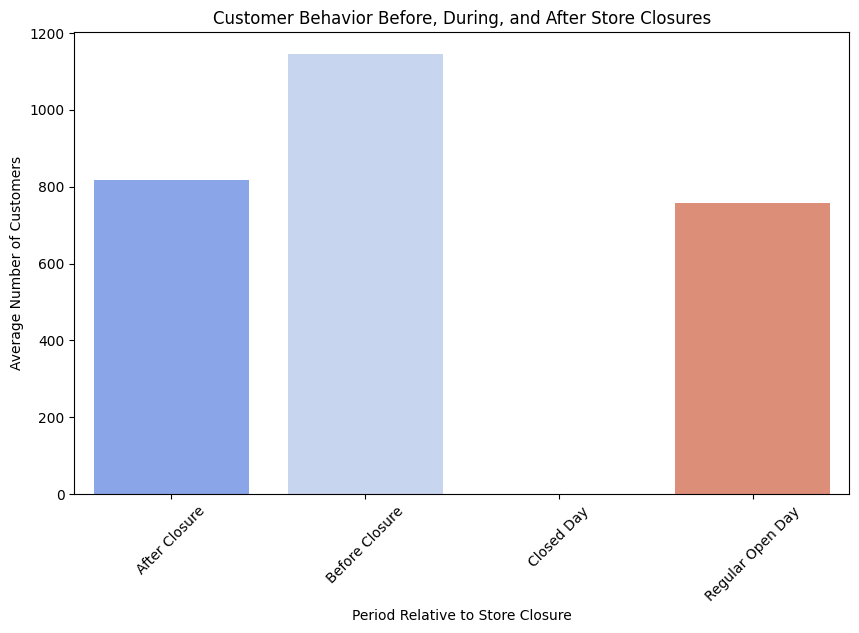

In [211]:
# Plotting customer behavior around store closures
plt.figure(figsize=(10, 6))
sns.barplot(x='OpenClosePeriod', y='Customers', data=open_close_behavior, palette='coolwarm', hue = 'OpenClosePeriod')

plt.title('Customer Behavior Before, During, and After Store Closures')
plt.xlabel('Period Relative to Store Closure')
plt.ylabel('Average Number of Customers')
plt.xticks(rotation=45)
plt.show()

Which stores are opened on all weekdays? How does that affect their sales on
weekends?

In [212]:
# Filter the stores that are open till Monday to Friday
weekdays_store_data = Data_for_train[Data_for_train['DayOfWeek'].isin([1,2,3,4,5])]

In [213]:
weekdays_store_data

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  Year  ...  IsHoliday  HolidayFlag  \
0                  0              1  2015  ...          1            1   
1                  0              1  2015  ...          1            1   
2                  0              1  2015  ...          1            1   
3                  0              1  2015  ...          1            1   
4                  0              1  2015  ...          1            1   
...              ...            ...   ...  ...        ...          ...   
1017204            a              1  2013  ...          0            1   
1017205            a              1  2013  ...          0            1   
1017206            a              1  2013  ...          0            1   
1017207            a              1  2013  ...          0            1   
1017208            a              1  2013  ...          0            1   

         BeforeHoliday  AfterHoliday   HolidayPeriod          Season  \
0                    1             0  During Holiday  Regular Season   
1                    1             1  During Holiday  Regular Season   
2                    1             1  During Holiday  Regular Season   
3                    1             1  During Holiday  Regular Season   
4                    1             1  During Holiday  Regular Season   
...                ...           ...             ...             ...   
1017204              1             1  During Holiday  Regular Season   
1017205              1             1  During Holiday  Regular Season   
1017206              1             1  During Holiday  Regular Season   
1017207              1             1  During Holiday  Regular Season   
1017208              0             1  During Holiday  Regular Season   

         SalesPerCustomer BeforeClose AfterClose   OpenClosePeriod  
0                9.482883           1          1  Regular Open Day  
1                9.702400           1          1  Regular Open Day  
2               10.126675           1          1  Regular Open Day  
3                9.342457           1          1  Regular Open Day  
4                8.626118           1          1  Regular Open Day  
...                   ...         ...        ...               ...  
1017204               NaN           0          0        Closed Day  
1017205               NaN           0          0        Closed Day  
1017206               NaN           0          0        Closed Day  
1017207               NaN           0          0        Closed Day  
1017208               NaN           1          0        Closed Day  

[727749 rows x 23 columns]

In [214]:
# Group by store and count unique open statuses across weekdays
weekday_open_status = weekdays_store_data.groupby('Store')['Open'].nunique().reset_index()

In [215]:
weekday_open_status

Store  Open
0         1     2
1         2     2
2         3     2
3         4     2
4         5     2
...     ...   ...
1110   1111     2
1111   1112     2
1112   1113     2
1113   1114     2
1114   1115     2

[1115 rows x 2 columns]

In [216]:
# Stores with 'Open' status = 1 mean they are open on all weekdays (always open)
stores_open_all_weekdays = weekday_open_status[weekday_open_status['Open'] == 1]['Store'].tolist()

In [217]:
stores_open_all_weekdays

[85, 262, 335, 423, 494, 562, 682, 733, 769, 1097]

In [218]:
# Create a flag for whether a store is open on all weekdays
Data_for_train['OpenAllWeekdays'] = Data_for_train['Store'].apply(lambda x: 1 if x in stores_open_all_weekdays else 0)

In [219]:
# Filter weekend data (6=Saturday, 7=Sunday)
weekend_data = Data_for_train[Data_for_train['DayOfWeek'].isin([6, 7])]

In [220]:
weekend_data.head(5)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
5575      1          7 2015-07-26      0          0     0      0            0   
5576      2          7 2015-07-26      0          0     0      0            0   
5577      3          7 2015-07-26      0          0     0      0            0   
5578      4          7 2015-07-26      0          0     0      0            0   
5579      5          7 2015-07-26      0          0     0      0            0   

      SchoolHoliday  Year  ...  HolidayFlag  BeforeHoliday  AfterHoliday  \
5575              0  2015  ...            0              0             1   
5576              0  2015  ...            0              0             0   
5577              0  2015  ...            0              0             0   
5578              0  2015  ...            0              0             0   
5579              0  2015  ...            0              0             0   

      HolidayPeriod          Season  SalesPerCustomer  BeforeClose AfterClose  \
5575  After Holiday  Regular Season               NaN            0          1   
5576    Regular Day  Regular Season               NaN            0          0   
5577    Regular Day  Regular Season               NaN            0          0   
5578    Regular Day  Regular Season               NaN            0          0   
5579    Regular Day  Regular Season               NaN            0          0   

     OpenClosePeriod  OpenAllWeekdays  
5575      Closed Day                0  
5576      Closed Day                0  
5577      Closed Day                0  
5578      Closed Day                0  
5579      Closed Day                0  

[5 rows x 24 columns]

In [221]:
# Group by 'OpenAllWeekdays' to calculate average weekend sales
weekend_sales_comparison = weekend_data.groupby('OpenAllWeekdays')['Sales'].mean().reset_index()

In [222]:
weekend_sales_comparison

OpenAllWeekdays         Sales
0                0   2945.493078
1                1  11627.113060

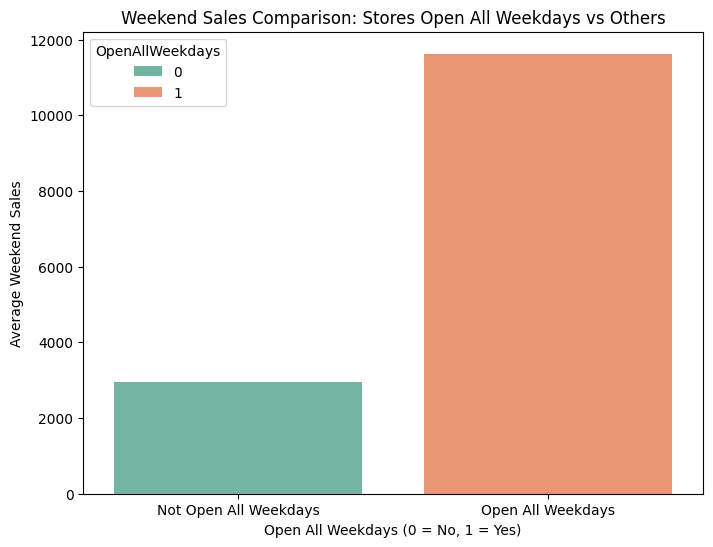

In [223]:
plt.figure(figsize=(8, 6))
sns.barplot(x='OpenAllWeekdays', y='Sales', data=weekend_sales_comparison, palette='Set2', hue ='OpenAllWeekdays')

plt.title('Weekend Sales Comparison: Stores Open All Weekdays vs Others')
plt.xlabel('Open All Weekdays (0 = No, 1 = Yes)')
plt.ylabel('Average Weekend Sales')
plt.xticks([0, 1], ['Not Open All Weekdays', 'Open All Weekdays'])
plt.show()

In [224]:
# Group by Date and OpenAllWeekdays to analyze sales trends
sales_trend_data = weekend_data.groupby(['Date', 'OpenAllWeekdays'])['Sales'].mean().reset_index()

In [225]:
sales_trend_data

Date  OpenAllWeekdays         Sales
0   2013-01-05                0   5310.445249
1   2013-01-05                1   8355.100000
2   2013-01-06                0     33.193665
3   2013-01-06                1  10722.500000
4   2013-01-12                0   5366.399095
..         ...              ...           ...
531 2015-07-19                1  15062.200000
532 2015-07-25                0   5365.629864
533 2015-07-25                1   9264.500000
534 2015-07-26                0    128.873303
535 2015-07-26                1  14346.000000

[536 rows x 3 columns]

Check how the assortment type affects sales

In [226]:
assortment_sales = merged_data.groupby('Assortment').agg({'Sales' :'mean'}).reset_index()
assortment_sales.columns = ['Assortment' , 'Avg_Sales']

In [227]:
assortment_sales

Assortment    Avg_Sales
0          a  5481.026096
1          b  8553.931999
2          c  6058.676567

Compare Assortment Types Across Store Types

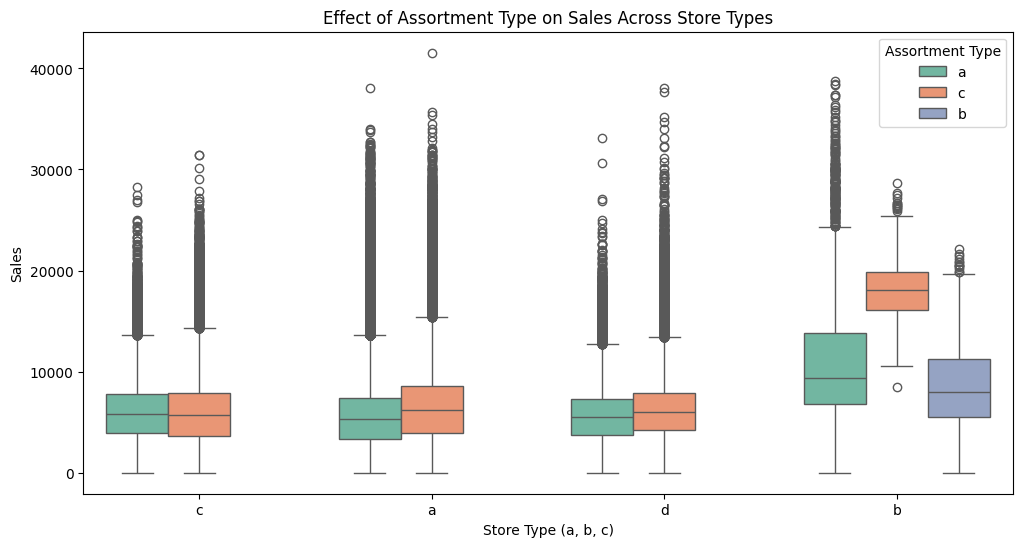

In [228]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x="StoreType", y="Sales", hue="Assortment", palette="Set2")

# Titles and labels
plt.title("Effect of Assortment Type on Sales Across Store Types")
plt.xlabel("Store Type (a, b, c)")
plt.ylabel("Sales")
plt.legend(title="Assortment Type")
plt.show()


In [229]:
# Compute average sales for each Store Type and Assortment combination
store_assortment_sales = merged_data.groupby(["StoreType", "Assortment"]).agg({"Sales": 'mean'}).reset_index()
store_assortment_sales.columns = ["StoreType", "Assortment", "Avg_Sales"]

In [230]:
store_assortment_sales

StoreType Assortment     Avg_Sales
0         a          a   5398.858310
1         a          c   6310.867032
2         b          a  10821.619806
3         b          b   8553.931999
4         b          c  17969.556263
5         c          a   5647.174314
6         c          c   5805.782193
7         d          a   5317.885943
8         d          c   5826.407660

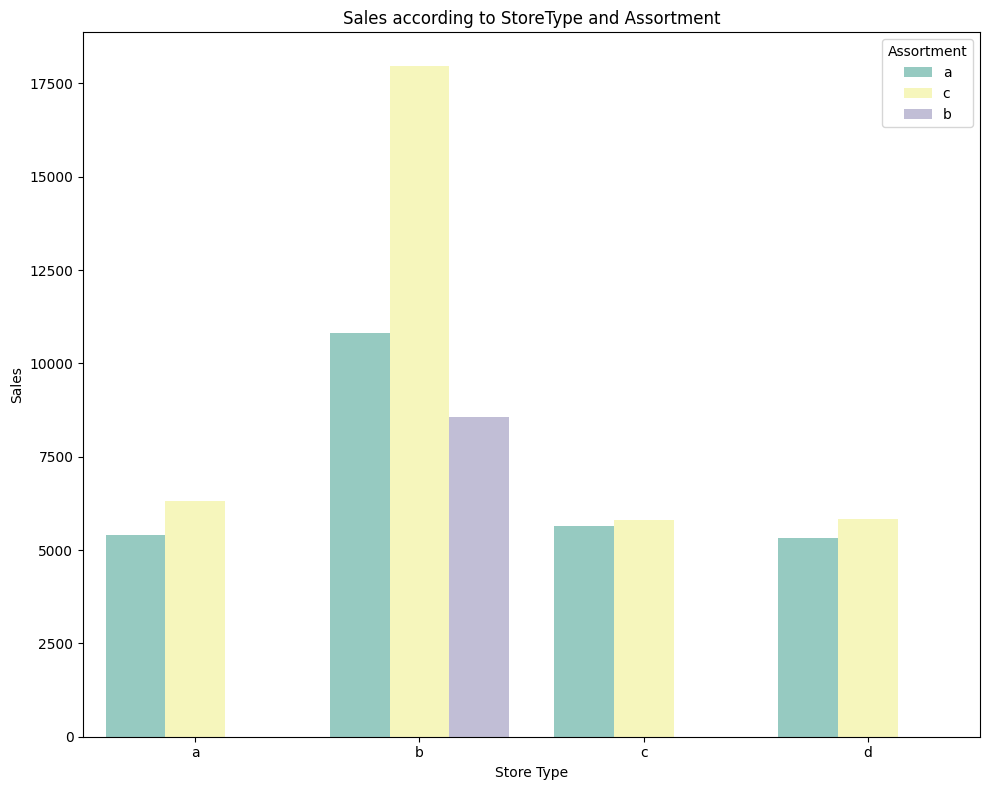

In [231]:
plt.figure(figsize=(10,8))
sns.barplot(x='StoreType', y = 'Avg_Sales' , data= store_assortment_sales, hue ='Assortment', palette='Set3')

plt.title("Sales according to StoreType and Assortment")
plt.xlabel("Store Type")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

How does the distance to the next competitor affect sales? What if the store and
its competitors all happen to be in city centres, does the distance matter in that
case?

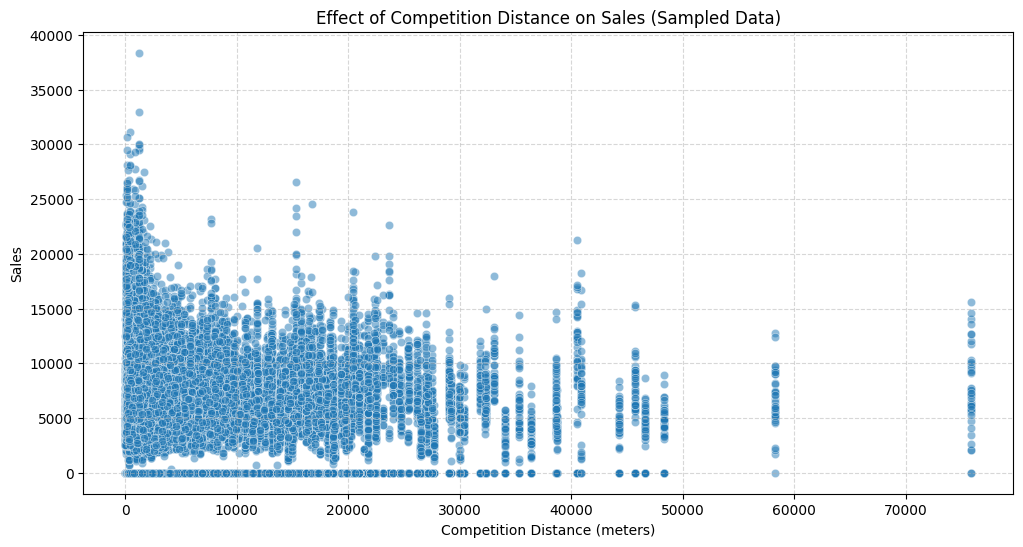

In [232]:
# How Distance to the next competitor affect sales
# Take a smaller sample to avoid memory issues in visualization
sampled_data = merged_data.sample(n=50000, random_state=42)

# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=sampled_data, x="CompetitionDistance", y="Sales", alpha=0.5)

# Titles and labels
plt.title("Effect of Competition Distance on Sales (Sampled Data)")
plt.xlabel("Competition Distance (meters)")
plt.ylabel("Sales")
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()


In [233]:
# Compute correlation between Competition Distance and Sales
correlation = merged_data[['CompetitionDistance', 'Sales']].corr().iloc[0, 1]

# Display correlation result
correlation

np.float64(-0.018609276350095506)

Identify stores in city centers vs. non-city areas

Assumption: Stores with lower competition distance are likely in city centers

In [234]:
# Define threshold for city center (e.g., stores with CompetitionDistance < 2000 meters)
city_center_threshold = 2000

# Create a new column to classify stores
merged_data['CityCenter'] = merged_data['CompetitionDistance'].apply(lambda x: 'City Center' if x < city_center_threshold else 'Non-City')

In [235]:
# Compute correlation separately for city center and non-city stores
city_center_corr = merged_data[merged_data['CityCenter'] == 'City Center'][['CompetitionDistance', 'Sales']].corr().iloc[0, 1]
non_city_corr = merged_data[merged_data['CityCenter'] == 'Non-City'][['CompetitionDistance', 'Sales']].corr().iloc[0, 1]

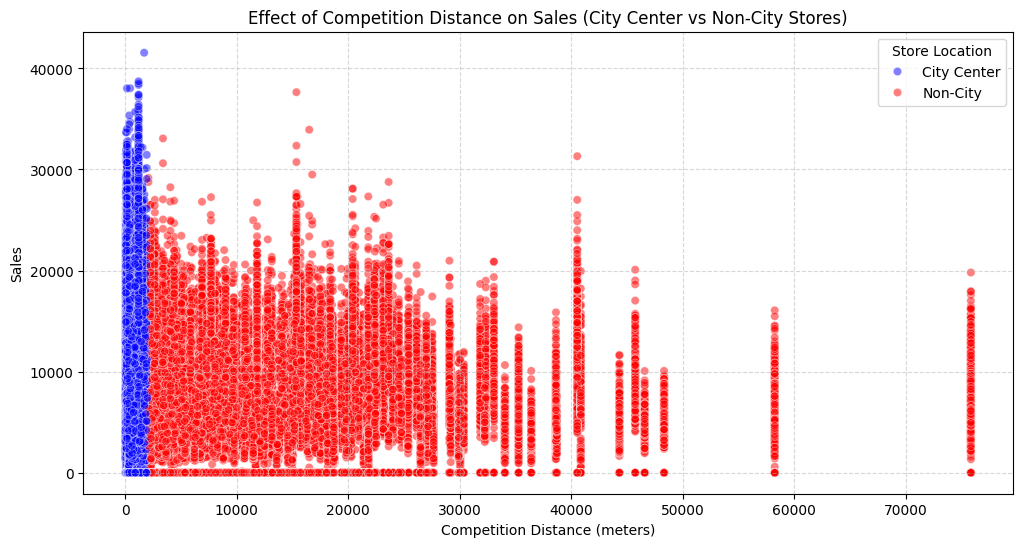

In [236]:
#Scatter Plot: Competition Distance vs Sales (City vs Non-City Stores)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_data, x="CompetitionDistance", y="Sales", hue="CityCenter", alpha=0.5, palette={'City Center': 'blue', 'Non-City': 'red'})

# Titles and labels
plt.title("Effect of Competition Distance on Sales (City Center vs Non-City Stores)")
plt.xlabel("Competition Distance (meters)")
plt.ylabel("Sales")
plt.legend(title="Store Location")
plt.grid(True, linestyle="--", alpha=0.5)

# Show plot
plt.show()

In [237]:
# Display correlation results for both categories
city_center_corr, non_city_corr

(np.float64(-0.03818289032108572), np.float64(0.021069369967065377))

City Centers(Competition Distance < 2000m):  correlation is negative → Closer competition reduces sales.

Non-City Areas(Competition Distance > 2000m):  correlation is positive, stores in non-city areas benefit from larger competition distances.

------------------------------------------------------------------------------------------------------------------------------------------------

Compare City vs. Non-City Stores by Promo Impact

In [238]:
# Group data by City Center status and Promo
promo_impact_city_vs_non_city = merged_data.groupby(['CityCenter', 'Promo'])['Sales'].mean().reset_index()

In [239]:
promo_impact_city_vs_non_city

CityCenter  Promo        Sales
0  City Center      0  4613.184417
1  City Center      1  8243.617088
2     Non-City      0  4235.268385
3     Non-City      1  7783.001439

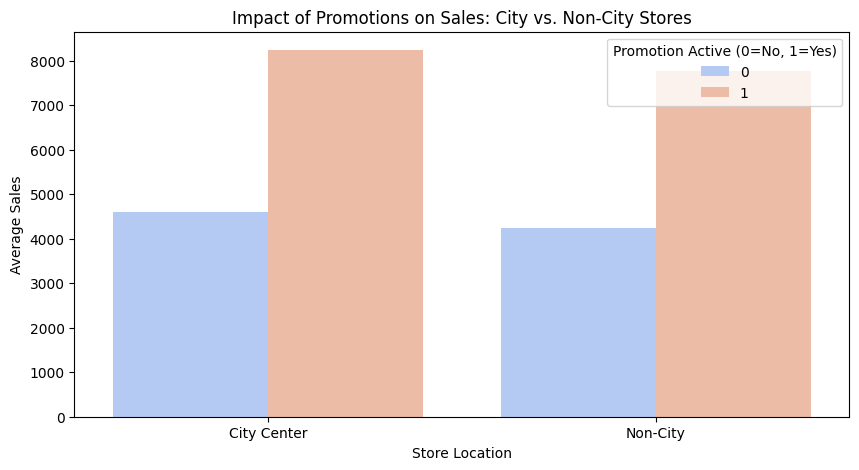

In [240]:
# Plot Promo Impact on Sales for City vs Non-City Stores
plt.figure(figsize=(10, 5))
sns.barplot(data=promo_impact_city_vs_non_city, x='CityCenter', y='Sales', hue='Promo', palette='coolwarm')
plt.title("Impact of Promotions on Sales: City vs. Non-City Stores")
plt.xlabel("Store Location")
plt.ylabel("Average Sales")
plt.legend(title="Promotion Active (0=No, 1=Yes)")
plt.show()

In [241]:
# Analyze the effect of StoreType on Competition

# Compute average competition distance for each store type
store_type_competition = merged_data.groupby('StoreType')['CompetitionDistance'].mean().reset_index()

In [242]:
store_type_competition

StoreType  CompetitionDistance
0         a          5157.630591
1         b          1066.058117
2         c          3516.699503
3         d          6922.062944

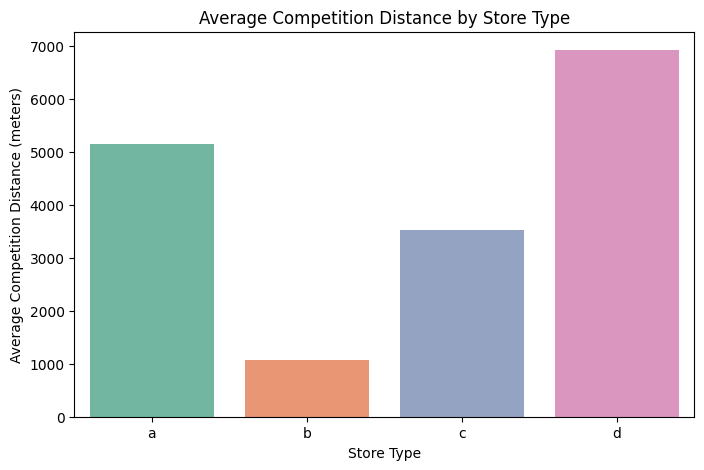

In [243]:
# Plot store type vs. competition distance
plt.figure(figsize=(8, 5))
sns.barplot(data=store_type_competition, x='StoreType', y='CompetitionDistance', palette='Set2', hue='StoreType')
plt.title("Average Competition Distance by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Average Competition Distance (meters)")
plt.show()

In [244]:
# Look at Monthly Trends to See Seasonality Effects

# Compute average sales per month
monthly_sales_trends = merged_data.groupby('Month')['Sales'].mean().reset_index()

In [245]:
monthly_sales_trends

Month        Sales
0       1  5465.395529
1       2  5645.253150
2       3  5784.578871
3       4  5738.866916
4       5  5489.639973
5       6  5760.964375
6       7  6064.915711
7       8  5693.016554
8       9  5570.246033
9      10  5537.037419
10     11  6008.111821
11     12  6826.611377

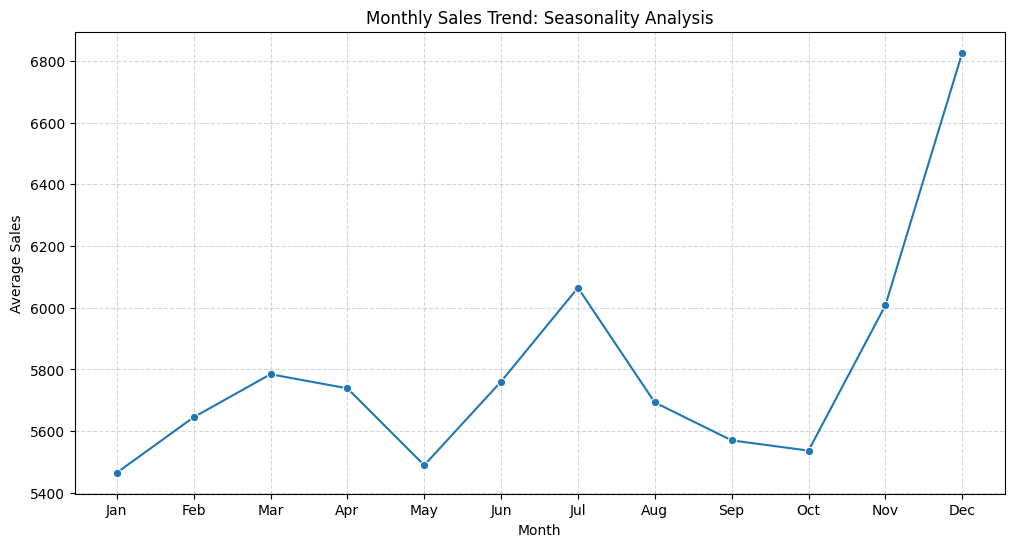

In [246]:
# Plot sales trends over months
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales_trends, x='Month', y='Sales', marker="o", linestyle="-")
plt.title("Monthly Sales Trend: Seasonality Analysis")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

1.2 - Logging

Log your steps using the logger library in python.

In [247]:
# Ensure logging is set up correctly
log_file_path = os.path.join(os.getcwd(), "eda_log.log")

In [248]:
logging.basicConfig(
    filename=log_file_path,  # Ensure correct file path
    filemode="w",  # Overwrite previous logs
    level=logging.INFO,
    format="%(asctime)s - %(levelname)s - %(message)s",
)

In [249]:
# Test if logging works
logging.info("Test log entry to check if logging is working.")

In [250]:
# Check if the log file was created
print(f"Log file should be created at: {log_file_path}")
print("Check the directory for 'eda_log.log'")

Log file should be created at: s:\Data Science by DigiCrome\Internship\Project_6\eda_log.log
Check the directory for 'eda_log.log'


In [251]:
logging.info("Started EDA on Train and Store Data")
# Load Data with logging
try:
    store_data_path = "./rossmann-store-sales/store.csv"
    train_data_path = "./rossmann-store-sales/train.csv"
    
    Data_for_store = pd.read_csv(store_data_path)
    Data_for_train = pd.read_csv(train_data_path,low_memory=False)
    
    logging.info("Successfully loaded train and store datasets")
except Exception as e:
    logging.error(f"Error loading datasets: {e}")

In [252]:
# Merge Datasets
try:
    logging.info("Successfully merged train and store data")
except Exception as e:
    logging.error(f"Error merging datasets: {e}")

# Check Missing Values
missing_values = merged_data.isnull().sum()
logging.info(f"Missing values found:\n{missing_values}")

# Handle Missing Values
logging.info("Handled missing values by filling with 0")

In [253]:
# Convert Date Column
try:
    merged_data['Date'] = pd.to_datetime(merged_data['Date'])
    logging.info("Converted 'Date' column to datetime format")
except Exception as e:
    logging.error(f"Error converting 'Date' column: {e}")

In [254]:
# Log Completion
logging.info("EDA Completed Successfully")

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [255]:
merged_data.to_csv("./rossmann-store-sales/merged_data.csv", index=False)